**Setting up the dataframe**

We take in the csv file, fix the datetime, and drop null values.

In [ ]:
# Luna Steed
# CS 4432
# 2/17/24
# Project 1: State with the Highest Median Infections
# Team 6: Luna Steed, Tanzim Mostafa, and Emily Elzinga

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('United_States_COVID-19_Community_Levels_by_County.csv')
df['date_updated'] = pd.to_datetime(df['date_updated'])
df['covid_cases_per_100k'] = df['covid_cases_per_100k'].dropna()
df['covid_hospital_admissions_per_100k'] = df['covid_hospital_admissions_per_100k'].dropna(0)
df['covid_inpatient_bed_utilization'] = df['covid_inpatient_bed_utilization'].dropna(0)
df.head()

<ipython-input-30-75acf49a5fde>:16: FutureWarning: In a future version of pandas all arguments of Series.dropna will be keyword-only.
  df['covid_hospital_admissions_per_100k'] = df['covid_hospital_admissions_per_100k'].dropna(0)
<ipython-input-30-75acf49a5fde>:17: FutureWarning: In a future version of pandas all arguments of Series.dropna will be keyword-only.
  df['covid_inpatient_bed_utilization'] = df['covid_inpatient_bed_utilization'].dropna(0)


county  county_fips      state  county_population  \
0    Lincoln County        55069  Wisconsin            27593.0   
1  Manitowoc County        55071  Wisconsin            78981.0   
2   Marathon County        55073  Wisconsin           135692.0   
3     Monroe County        55081  Wisconsin            46253.0   
4    Portage County        55097  Wisconsin            70772.0   

   health_service_area_number                        health_service_area  \
0                         282           Marathon (Wausau), WI - Wood, WI   
1                         355  Sheboygan (Sheboygan), WI - Manitowoc, WI   
2                         282           Marathon (Wausau), WI - Wood, WI   
3                         290     La Crosse (La Crosse), WI - Monroe, WI   
4                         400                                Portage, WI   

   health_service_area_population  covid_inpatient_bed_utilization  \
0                        291401.0                              4.7   
1                        244410.0                              3.4   
2                        291401.0                              4.7   
3                        257027.0                              3.9   
4                         70772.0                              5.9   

   covid_hospital_admissions_per_100k  covid_cases_per_100k  \
0                                13.4                177.58   
1                                 9.8                169.66   
2                                13.4                209.30   
3                                15.6                216.20   
4                                 7.1                217.60   

  covid-19_community_level date_updated  
0                   Medium   2022-08-18  
1                      Low   2022-08-18  
2                     High   2022-08-18  
3                     High   2022-08-18  
4                   Medium   2022-08-18

**Group by States and Months**

We group by the states and months, looking at the main 3 values that we are
concerned with.

The resulting dataframe will contain information for all states and territories.

In [ ]:
all_states = df[['covid_cases_per_100k',
                'covid_hospital_admissions_per_100k',
                'covid_inpatient_bed_utilization']
                ].groupby([df['state'], df['date_updated'].dt.to_period('M')]) # Group by state and months

all_states.head()

covid_cases_per_100k  covid_hospital_admissions_per_100k  \
0                     177.58                                13.4   
1                     169.66                                 9.8   
2                     209.30                                13.4   
3                     216.20                                15.6   
4                     217.60                                 7.1   
...                      ...                                 ...   
110438                  0.00                                 NaN   
111255                 40.41                                 1.0   
111342                 95.78                                 6.1   
112027                 33.24                                 3.6   
112815                  2.11                                 0.0   

        covid_inpatient_bed_utilization  
0                                   4.7  
1                                   3.4  
2                                   4.7  
3                                   3.9  
4                                   5.9  
...                                 ...  
110438                              NaN  
111255                              0.9  
111342                              3.9  
112027                              0.3  
112815                              0.0  

[2464 rows x 3 columns]

**Finding the State with the Highest Cases By Median**

We are interested in the medians of the covid cases, so we look specifically at the all_states 'cases per 100k' column and take the median.

Because it's grouped by states and months, it will give us the medians of each
month.

We group this by the state and take the median again to get the overall median
over time for every state.

In [ ]:
state_medians = df.groupby(['state', df['date_updated'].dt.to_period('M')])['covid_cases_per_100k'].median()
state_medians_over_time = state_medians.groupby('state').median()
state_medians_over_time = state_medians_over_time.sort_values()

state_medians_over_time.head()

state
Nevada          38.420
Nebraska        57.360
Utah            59.390
South Dakota    71.205
Arizona         72.740
Name: covid_cases_per_100k, dtype: float64

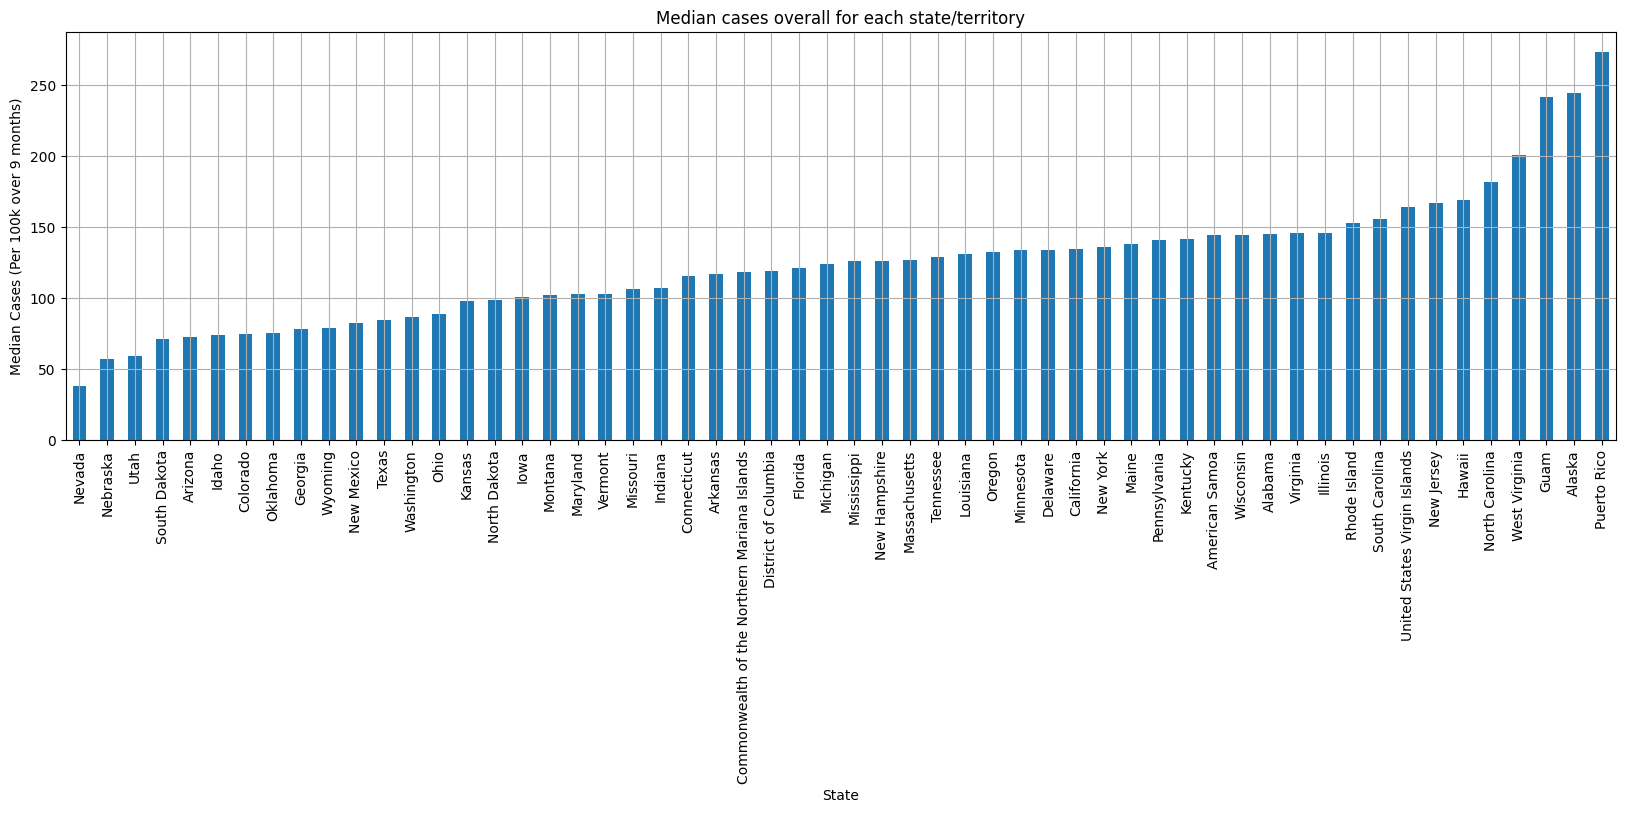

In [ ]:
# Graph the state_medians_over_time in a bar chart

fig = plt.figure(figsize=(20,6))
state_medians_over_time.plot.bar()
plt.title('Median cases overall for each state/territory')
plt.xlabel('State')
plt.ylabel('Median Cases (Per 100k over 9 months)')
plt.xticks(rotation = 90)
plt.grid(True)
spacing = 0.2
fig.subplots_adjust(bottom=spacing)
plt.show()

In [ ]:
highest_median = np.max(state_medians_over_time)

highest_median

273.48

In [ ]:
highest_state = dict((v,k) for k,v in state_medians_over_time.items()).get(highest_median)

print('The state/territory with the highest median infections over time was ' + highest_state + ', with a median infection over time of: ' + str(highest_median))

The state/territory with the highest median infections over time was Puerto Rico, with a median infection over time of: 273.48


**Max/Min Counties**

Now that we know the state/territory with the highest overall cases over the span of months, we can slice that state out of the main dataframe to look at its counties.

We are interested in seeing the counties with the highest overall infection rates as well as the lowest overall.

In [ ]:
hs = df.loc[df['state'] == highest_state].copy()

hs.head()

county  county_fips        state  county_population  \
14  Aguas Buenas Muni        72007  Puerto Rico            24814.0   
15        Arroyo Muni        72015  Puerto Rico            17238.0   
16   Barceloneta Muni        72017  Puerto Rico            23727.0   
17  Barranquitas Muni        72019  Puerto Rico            27725.0   
18     Cabo Rojo Muni        72023  Puerto Rico            47515.0   

    health_service_area_number health_service_area  \
14                         904         Puerto Rico   
15                         904         Puerto Rico   
16                         904         Puerto Rico   
17                         904         Puerto Rico   
18                         904         Puerto Rico   

    health_service_area_population  covid_inpatient_bed_utilization  \
14                       3193694.0                              3.9   
15                       3193694.0                              3.9   
16                       3193694.0                              3.9   
17                       3193694.0                              3.9   
18                       3193694.0                              3.9   

    covid_hospital_admissions_per_100k  covid_cases_per_100k  \
14                                 7.0                467.48   
15                                 7.0                690.34   
16                                 7.0                598.47   
17                                 7.0                425.61   
18                                 7.0                387.25   

   covid-19_community_level date_updated  
14                   Medium   2022-08-18  
15                   Medium   2022-08-18  
16                   Medium   2022-08-18  
17                   Medium   2022-08-18  
18                   Medium   2022-08-18

Group by county and month: this will let us graph for all of Puerto Rico as well as the max/min counties individually later.

In [ ]:
by_county = hs[['county_population',
                'covid_cases_per_100k',
                'covid_hospital_admissions_per_100k',
                'covid_inpatient_bed_utilization']].groupby([hs['county'], hs['date_updated'].dt.to_period('M')])

by_county.head()

county_population  covid_cases_per_100k  \
14                24814.0                467.48   
15                17238.0                690.34   
16                23727.0                598.47   
17                27725.0                425.61   
18                47515.0                387.25   
...                   ...                   ...   
112831            19249.0                202.61   
112832            35989.0                119.48   
112833            21209.0                165.02   
112834            27395.0                233.62   
112835            50023.0                231.89   

        covid_hospital_admissions_per_100k  covid_inpatient_bed_utilization  
14                                     7.0                              3.9  
15                                     7.0                              3.9  
16                                     7.0                              3.9  
17                                     7.0                              3.9  
18                                     7.0                              3.9  
...                                    ...                              ...  
112831                                 2.9                              1.4  
112832                                 2.9                              1.4  
112833                                 2.9                              1.4  
112834                                 2.9                              1.4  
112835                                 2.9                              1.4  

[2730 rows x 4 columns]

Find the medians and the medians over time

In [ ]:
hs_median_cases = by_county['covid_cases_per_100k'].median()

hs_median_cases

county         date_updated
Adjuntas Muni  2022-02           51.830
               2022-03           69.110
               2022-04          207.340
               2022-05         1120.195
               2022-06         1053.970
                                 ...   
Yauco Muni     2022-06          950.110
               2022-07          650.780
               2022-08          625.465
               2022-09          327.620
               2022-10          315.710
Name: covid_cases_per_100k, Length: 702, dtype: float64

In [ ]:
hs_median_over_time = hs_median_cases.groupby('county').median()

hs_median_over_time

county
Adjuntas Muni        299.49
Aguada Muni          275.25
Aguadilla Muni       258.63
Aguas Buenas Muni    350.61
Aibonito Muni        398.05
                      ...  
Vega Baja Muni       299.86
Vieques Muni         155.02
Villalba Muni        299.46
Yabucoa Muni         269.50
Yauco Muni           327.62
Name: covid_cases_per_100k, Length: 78, dtype: float64

Fun fact: there's 78 counties in Puerto Rico

In [ ]:
print(len(hs_median_over_time))

78


**Median Most/Least Infected Counties**

Calculate and display the county with the highest median infections and lowest median infections.

In [ ]:
min_county_num = np.min(hs_median_over_time)
min_county = dict((v, k) for k,v in hs_median_over_time.items()).get(min_county_num)

max_county_num = np.max(hs_median_over_time)
max_county = dict((v, k) for k,v in hs_median_over_time.items()).get(max_county_num)


print('Min Median County: ' + min_county + ' With Median Cases of: ' + '{:.2f}'.format(min_county_num))

Min Median County: Las Marías Muni With Median Cases of: 138.77


In [ ]:
print('Max Median County: ' + max_county + ' With Median Cases of: ' + '{:.2f}'.format(max_county_num))

Max Median County: Lares Muni With Median Cases of: 580.82


**Admissions vs. Bed Utilization**

This will let us examine how many hospitalizations wound up requiring hospital stays.

We can also compare the infection rate (infections / population) vs. the bed utilization.

In [ ]:
county_median_bed_utilization = by_county['covid_inpatient_bed_utilization'].median()

county_median_bed_utilization

county         date_updated
Adjuntas Muni  2022-02         1.60
               2022-03         0.40
               2022-04         0.95
               2022-05         3.30
               2022-06         3.90
                               ... 
Yauco Muni     2022-06         3.90
               2022-07         3.65
               2022-08         3.85
               2022-09         3.00
               2022-10         1.70
Name: covid_inpatient_bed_utilization, Length: 702, dtype: float64

**Hospital Admission Stats**

Now we will find the statistics on hospital admissions by county in the highest infected state/territory.

In [ ]:
county_median_hospitalizations = by_county['covid_hospital_admissions_per_100k'].median()

county_median_hospitalizations

county         date_updated
Adjuntas Muni  2022-02         2.4
               2022-03         1.4
               2022-04         3.4
               2022-05         7.8
               2022-06         8.8
                              ... 
Yauco Muni     2022-06         8.8
               2022-07         6.3
               2022-08         7.7
               2022-09         5.2
               2022-10         2.9
Name: covid_hospital_admissions_per_100k, Length: 702, dtype: float64

**County Populations and Infection Rate**

In [ ]:
county_populations = by_county['county_population'].median()
county_pop_over_time = county_populations.groupby('county').median()

county_pop_over_time

county
Adjuntas Muni        17363.0
Aguada Muni          36694.0
Aguadilla Muni       50265.0
Aguas Buenas Muni    24814.0
Aibonito Muni        22108.0
                      ...   
Vega Baja Muni       50023.0
Vieques Muni          8386.0
Villalba Muni        21372.0
Yabucoa Muni         32282.0
Yauco Muni           33575.0
Name: county_population, Length: 78, dtype: float64

In [ ]:
nozeros_pop_over_time = county_pop_over_time.loc[county_pop_over_time != 0].copy()

county_infection_rate_ot = hs_median_over_time / 100,000

infection_percent = county_infection_rate_ot

infection_percent

(county
 Adjuntas Muni        2.9949
 Aguada Muni          2.7525
 Aguadilla Muni       2.5863
 Aguas Buenas Muni    3.5061
 Aibonito Muni        3.9805
                       ...  
 Vega Baja Muni       2.9986
 Vieques Muni         1.5502
 Villalba Muni        2.9946
 Yabucoa Muni         2.6950
 Yauco Muni           3.2762
 Name: covid_cases_per_100k, Length: 78, dtype: float64,
 0)

Now we are ready to look at the bed utilization vs. hospital admissions.

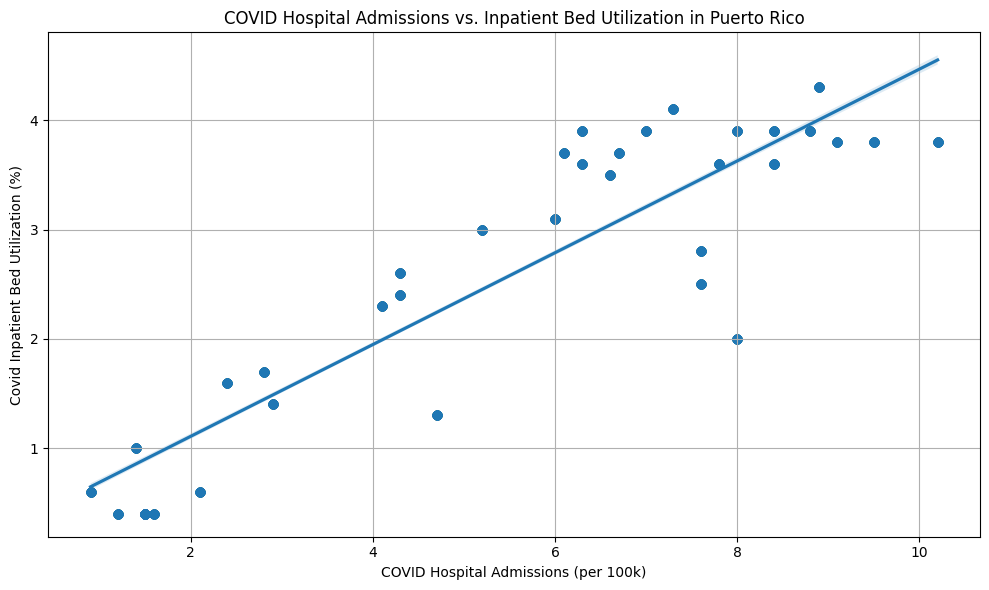

In [ ]:
# Bed Utilization vs. Hospital Admissions
plt.figure(figsize=(10,6))
sns.regplot(x='covid_hospital_admissions_per_100k', y='covid_inpatient_bed_utilization', data=hs)
plt.title('COVID Hospital Admissions vs. Inpatient Bed Utilization in Puerto Rico')
plt.xlabel('COVID Hospital Admissions (per 100k)')
plt.ylabel('Covid Inpatient Bed Utilization (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

**Month to Month Progression**

We want to look at the month to month progression of Covid in Puerto Rico as a whole, and in the two counties we are interested in.

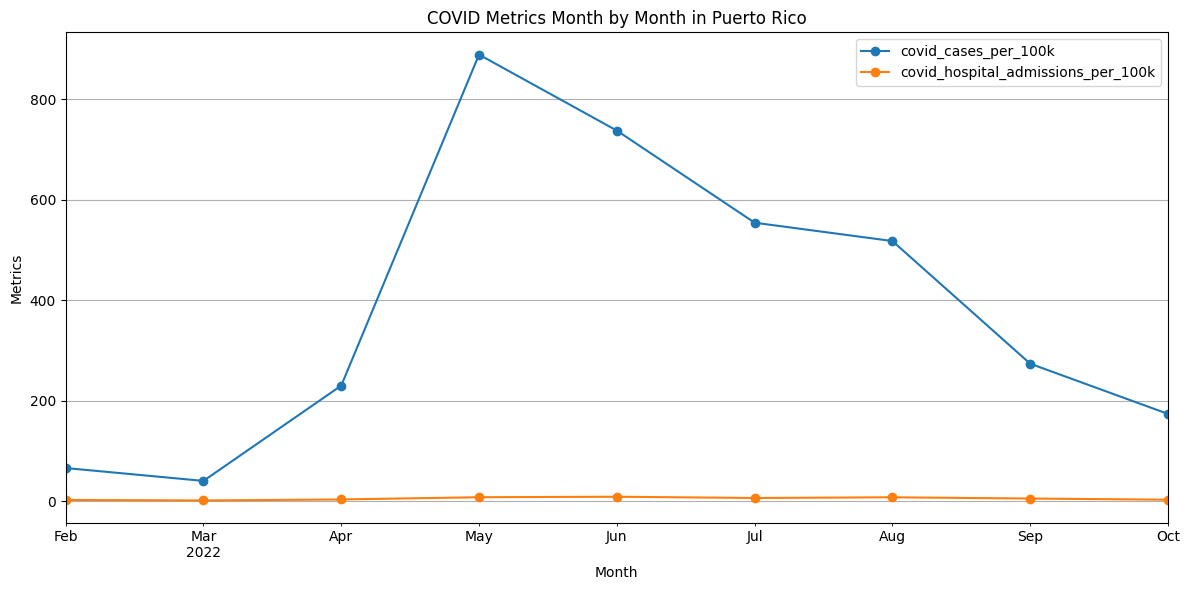

In [ ]:
# Month to Month in Puerto Rico
monthly_stats_hs = hs.groupby(hs['date_updated'].dt.to_period('M')).agg({
    'covid_cases_per_100k': 'median',
    'covid_hospital_admissions_per_100k': 'median'
})

monthly_stats_hs = monthly_stats_hs.dropna()

plt.figure(figsize=(12,6))
monthly_stats_hs.plot(marker='o', ax=plt.gca())
plt.title('COVID Metrics Month by Month in {state}'.format(state= highest_state))
plt.xlabel('Month')
plt.ylabel('Metrics')
plt.xticks(rotation = 45)
plt.grid(True)
plt.tight_layout()
plt.show()


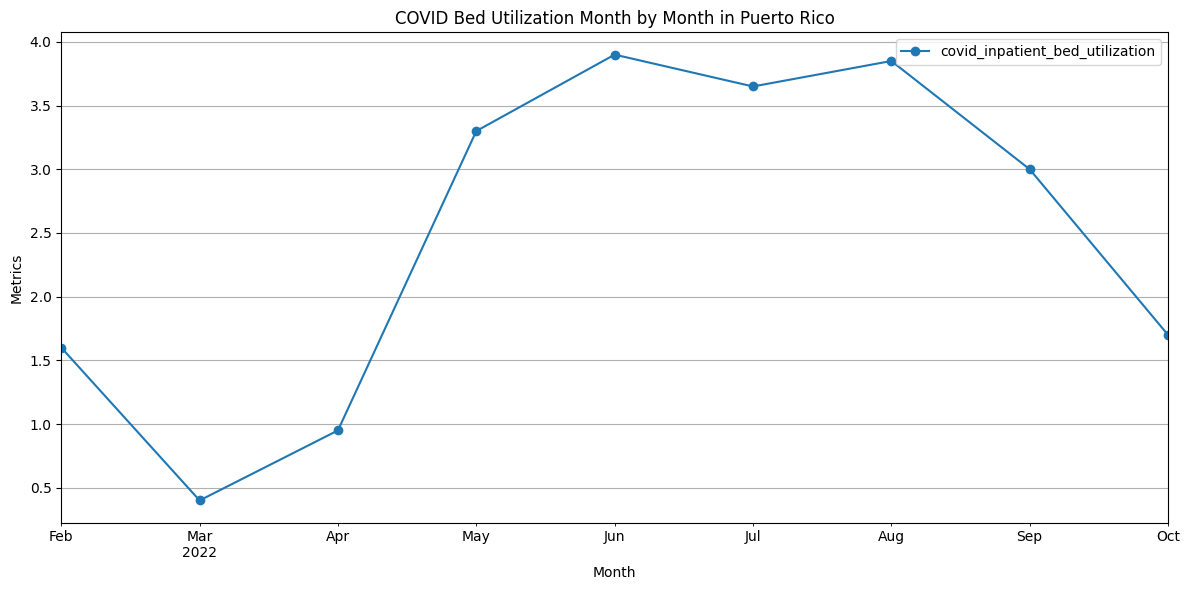

In [ ]:
# Month to Month Bed Utilization in Puerto Rico
monthly_stats_hs = hs.groupby(hs['date_updated'].dt.to_period('M')).agg({
    'covid_inpatient_bed_utilization': 'median'
})

plt.figure(figsize=(12,6))
monthly_stats_hs.plot(marker='o', ax=plt.gca())
plt.title('COVID Bed Utilization Month by Month in {state}'.format(state= highest_state))
plt.xlabel('Month')
plt.ylabel('Metrics')
plt.xticks(rotation = 45)
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


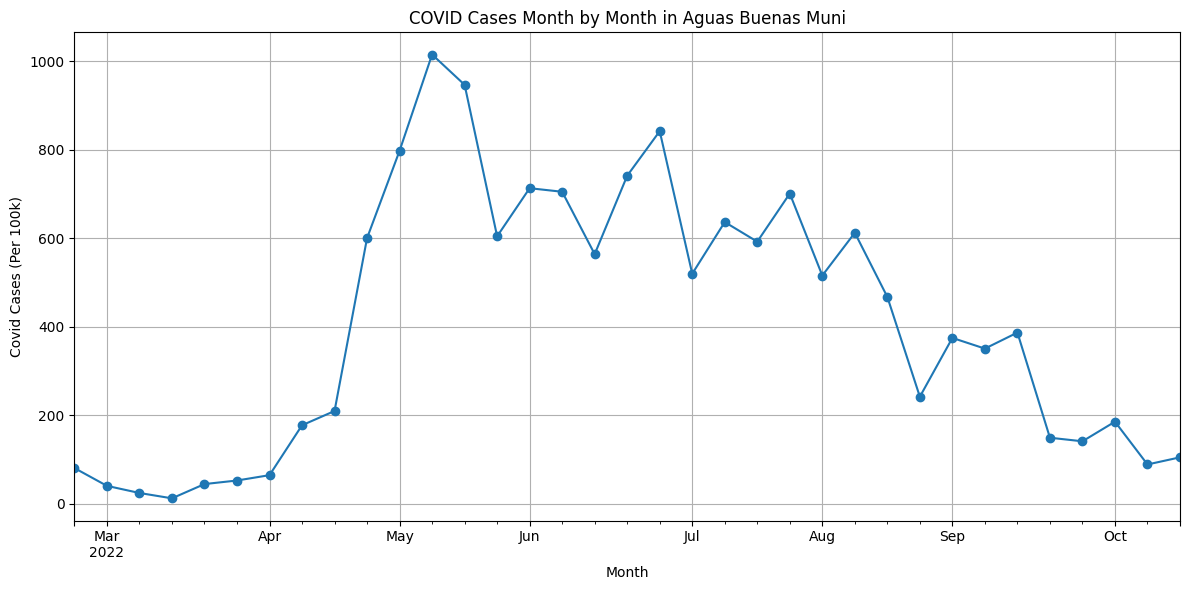

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


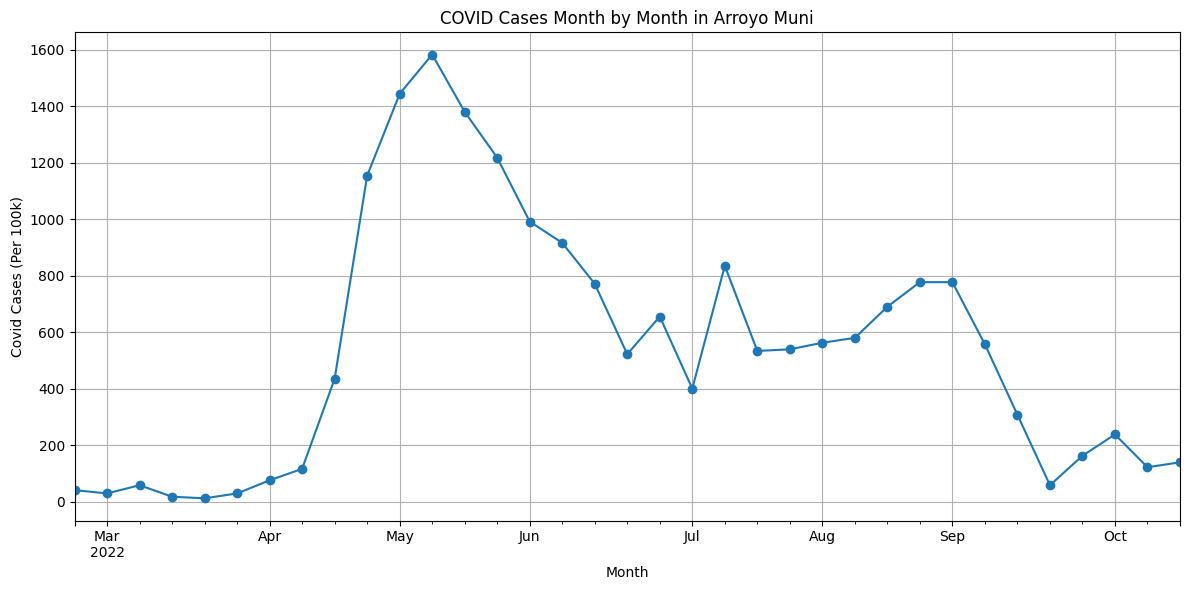

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


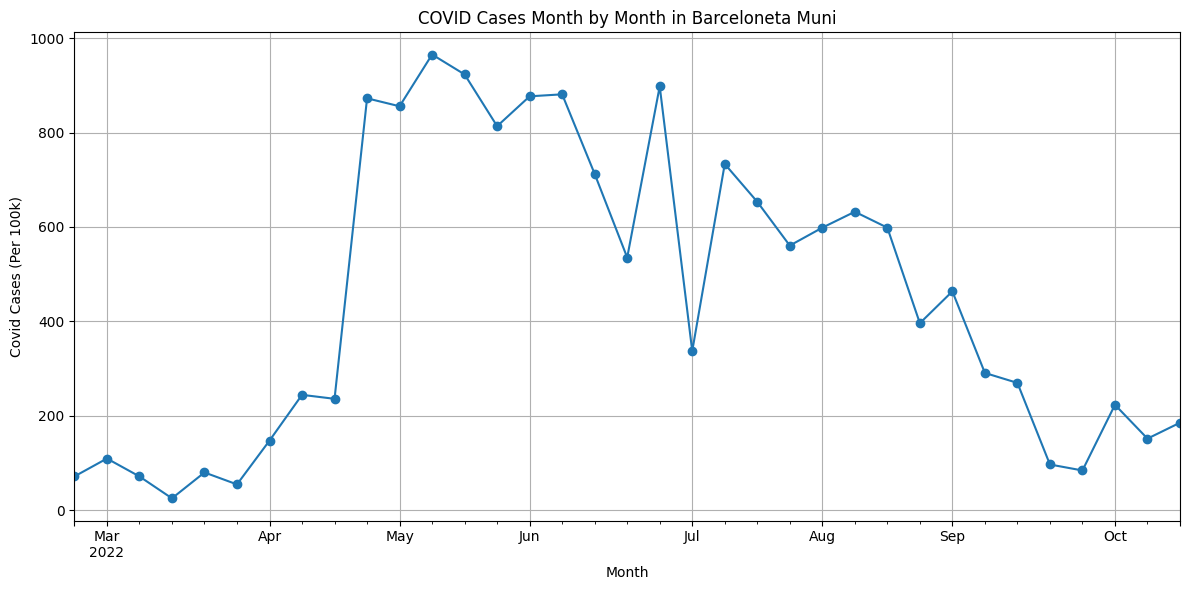

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


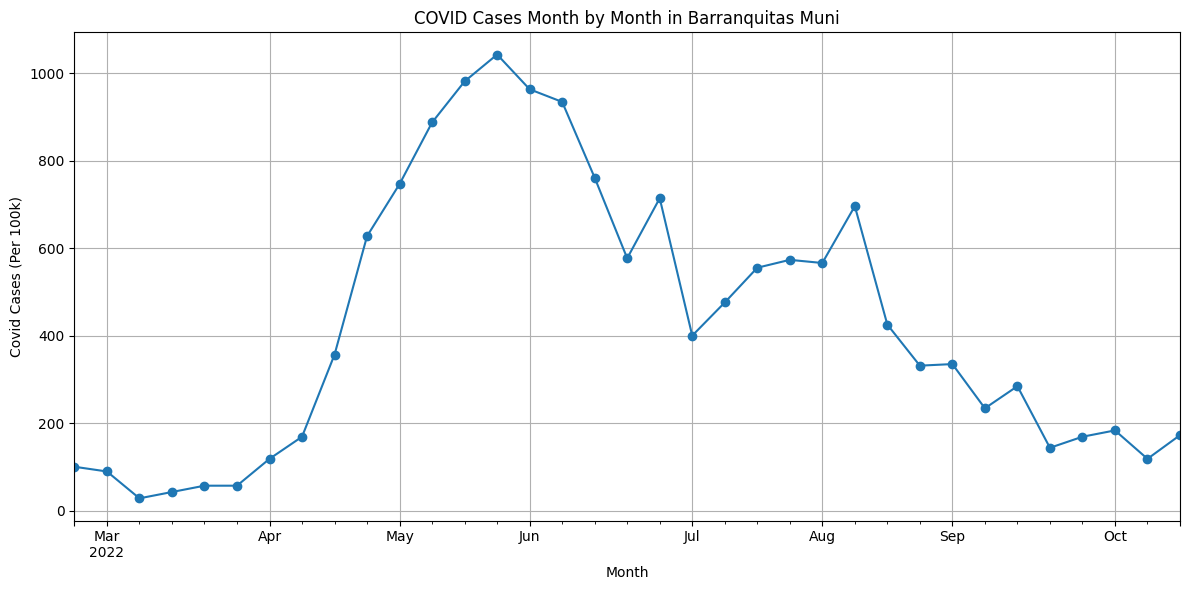

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


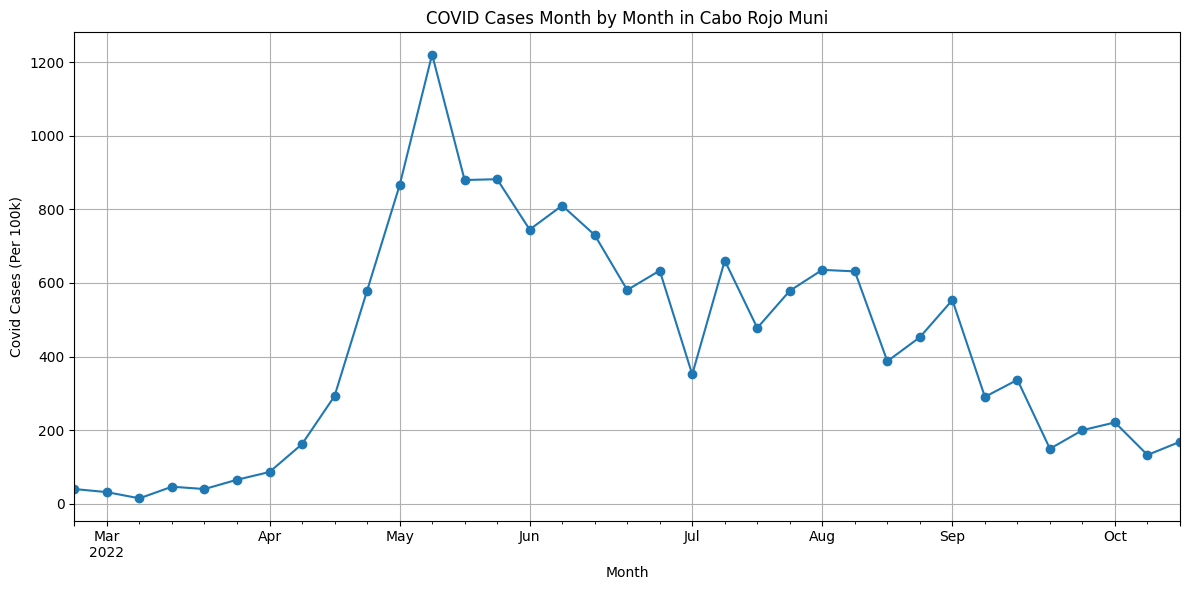

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


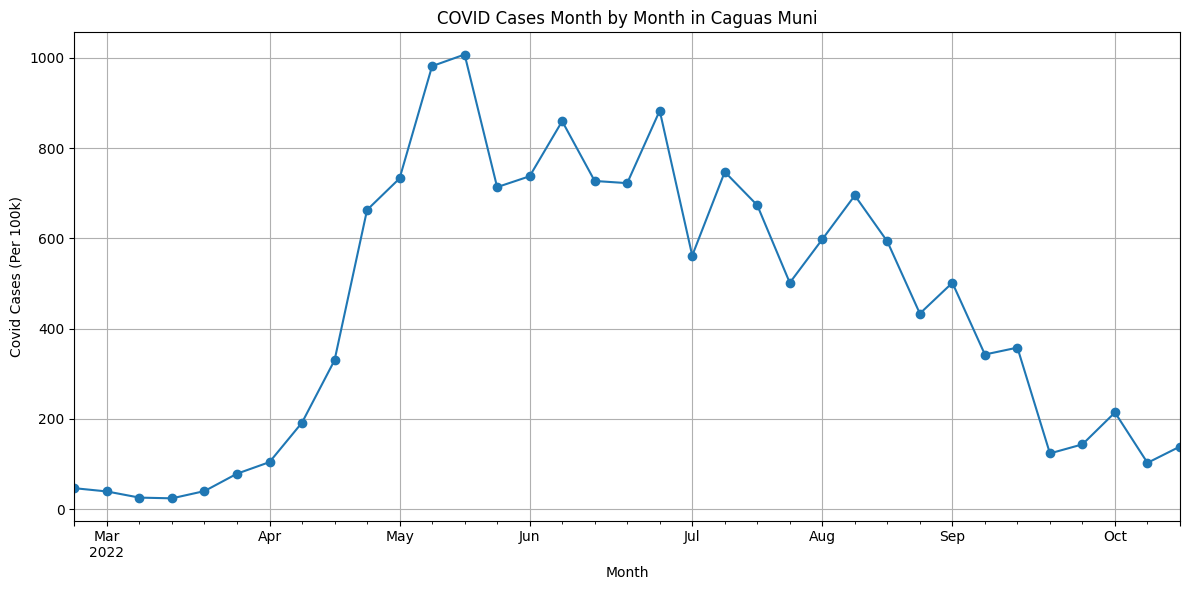

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


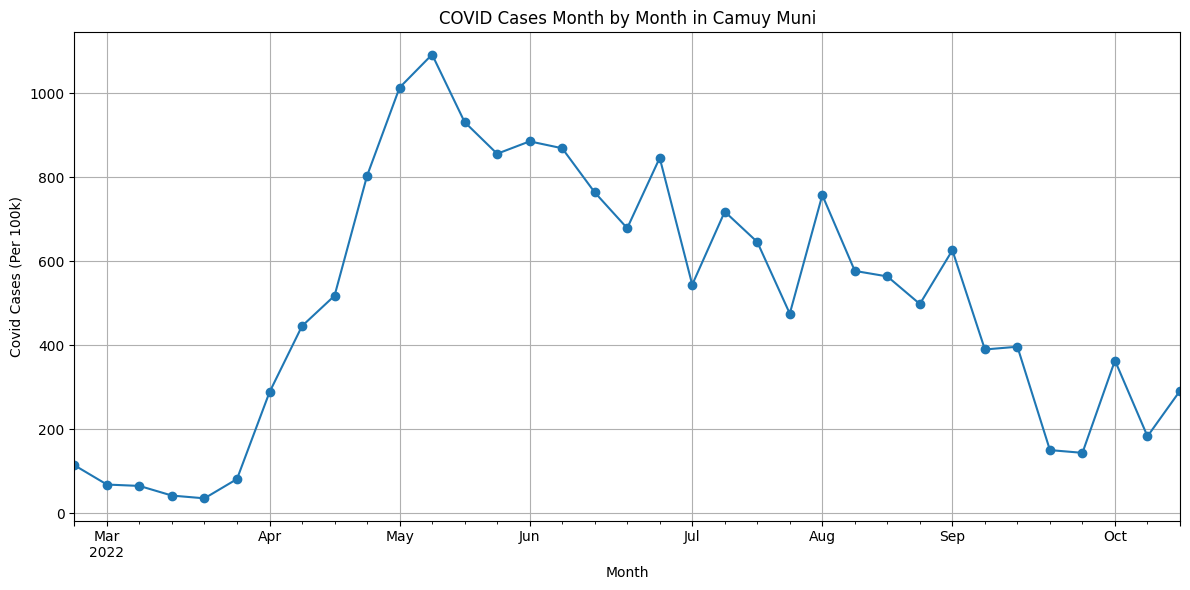

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


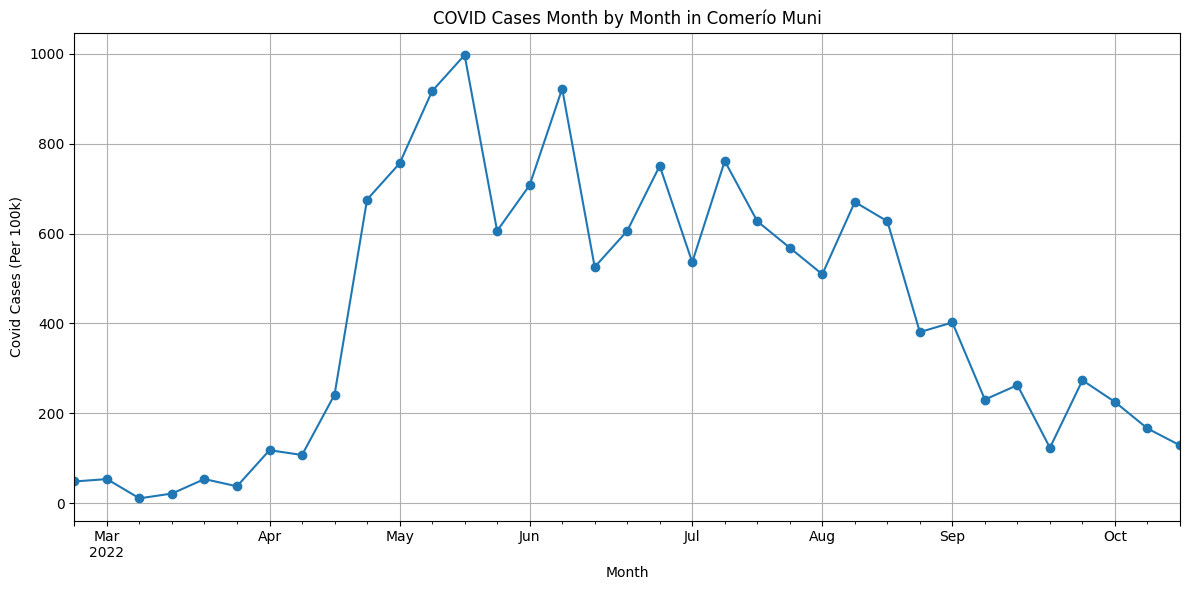

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


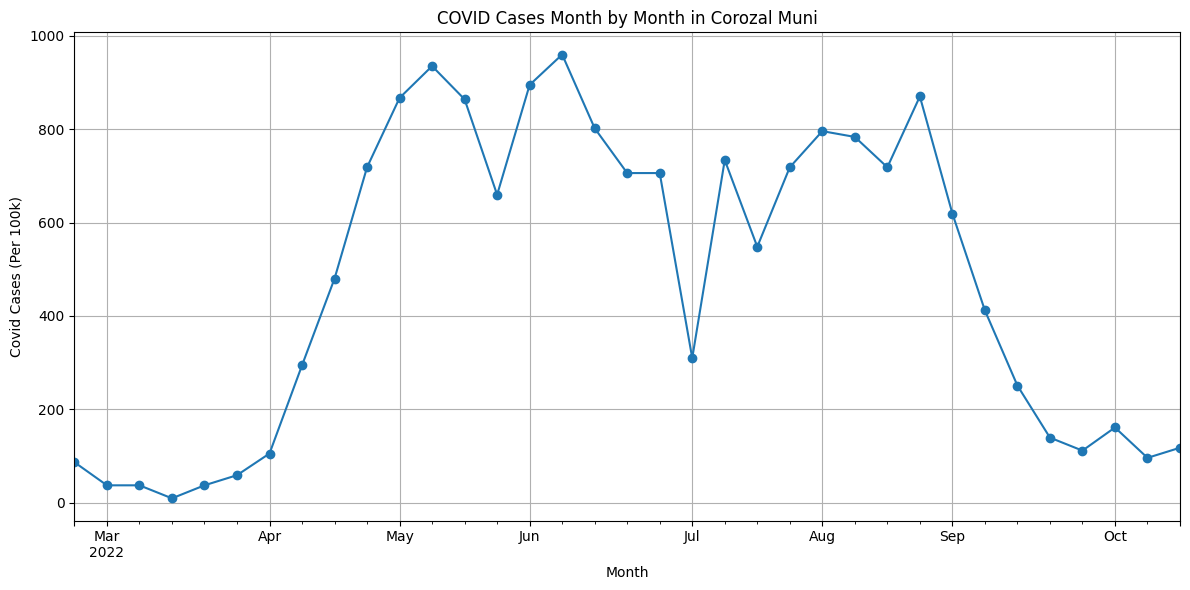

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


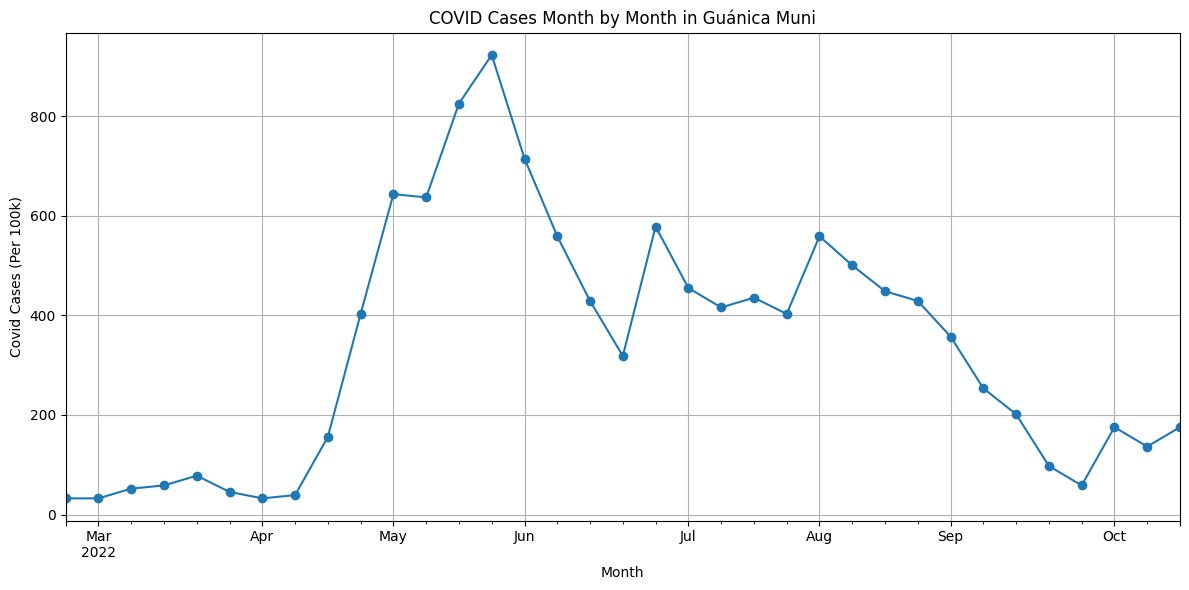

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


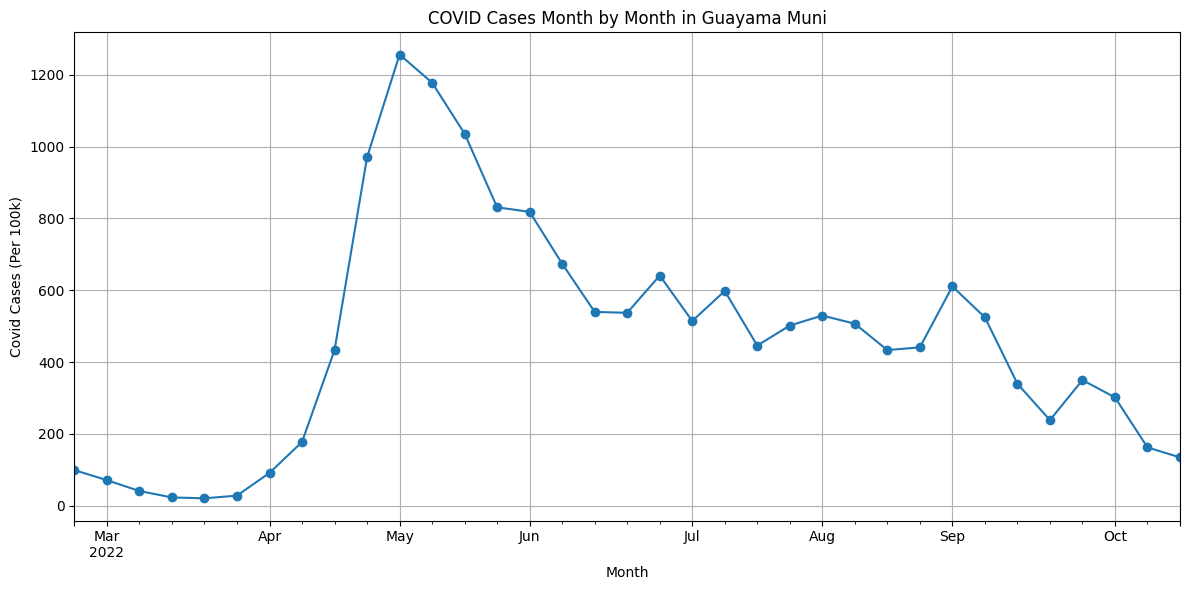

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


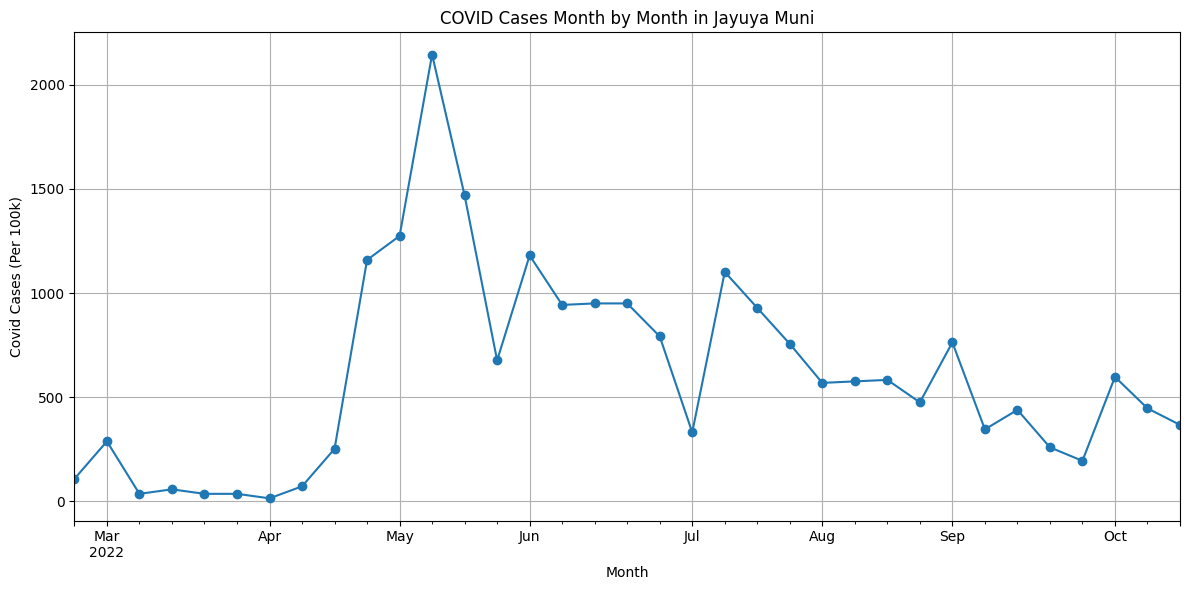

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


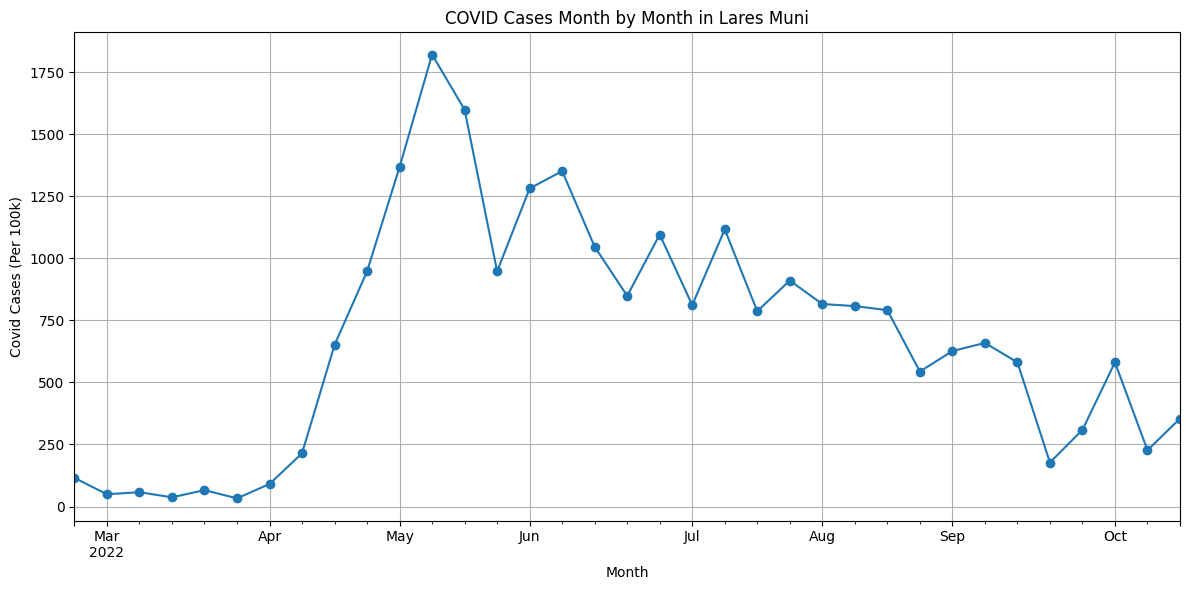

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


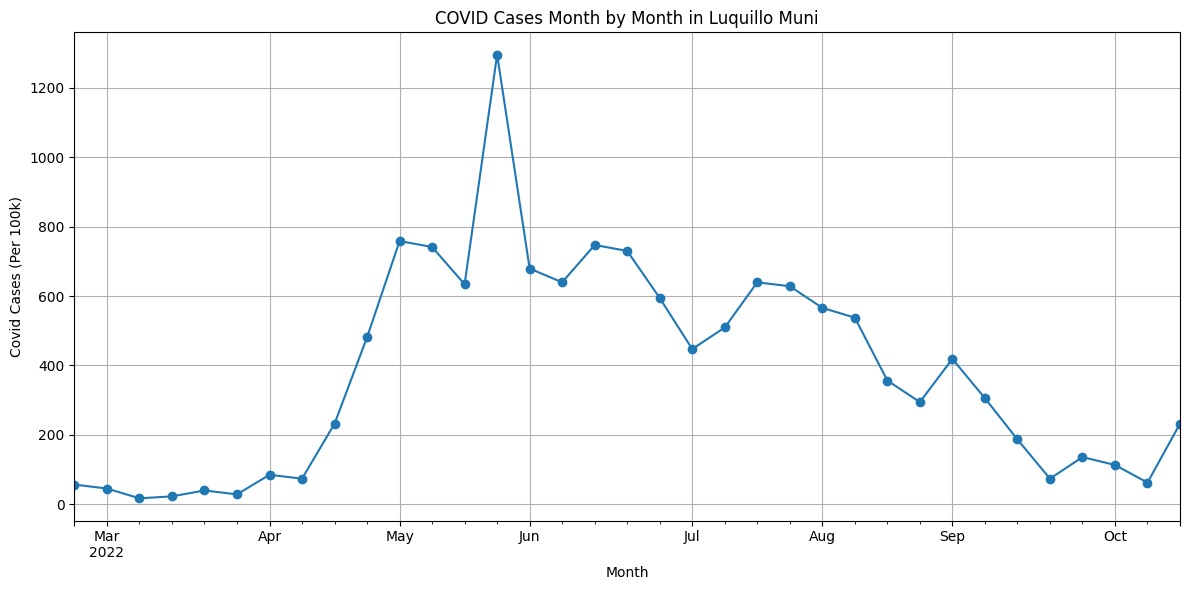

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


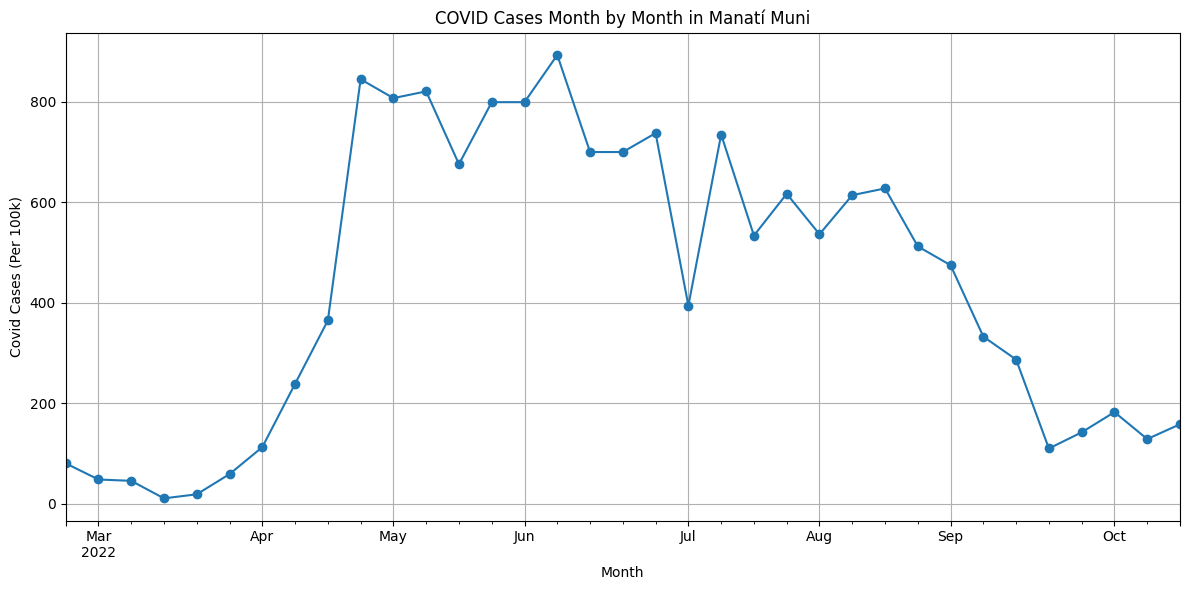

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


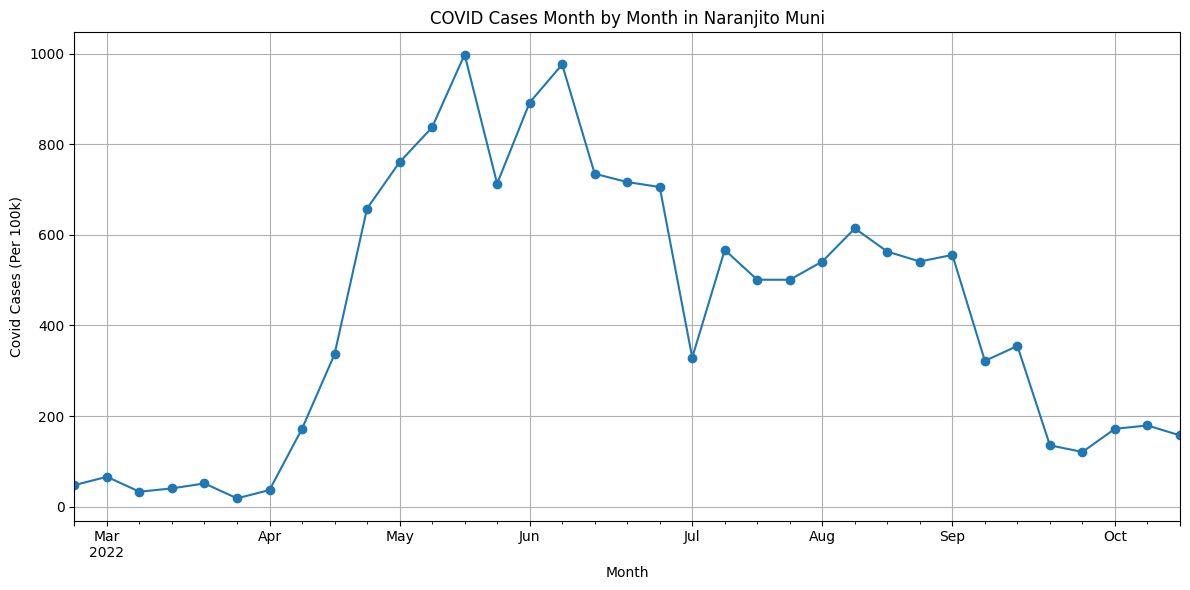

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


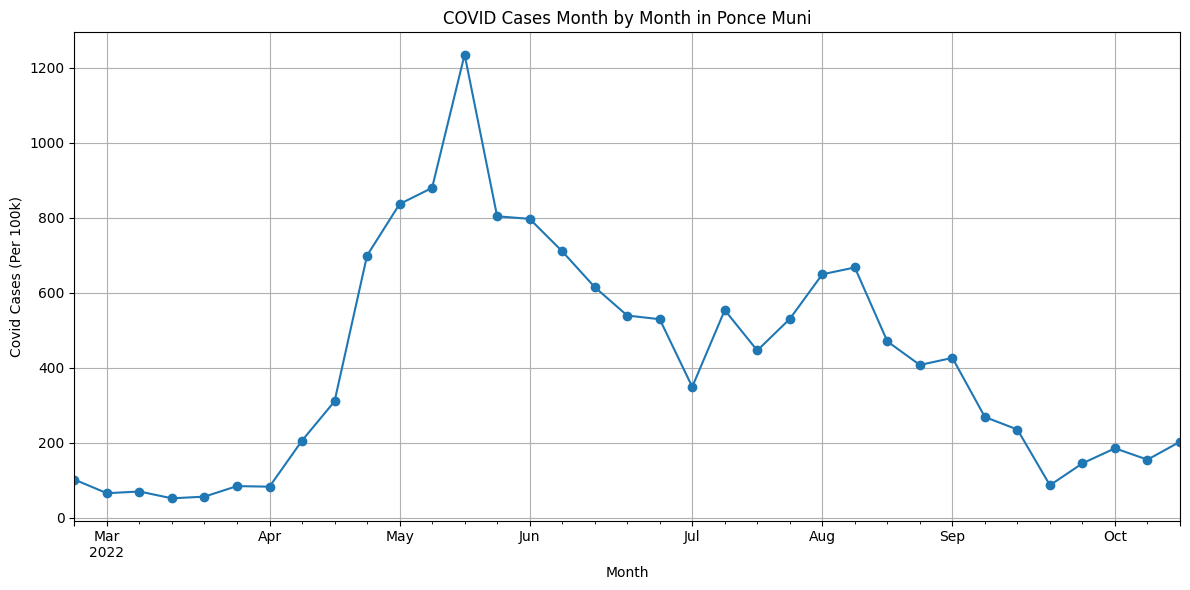

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


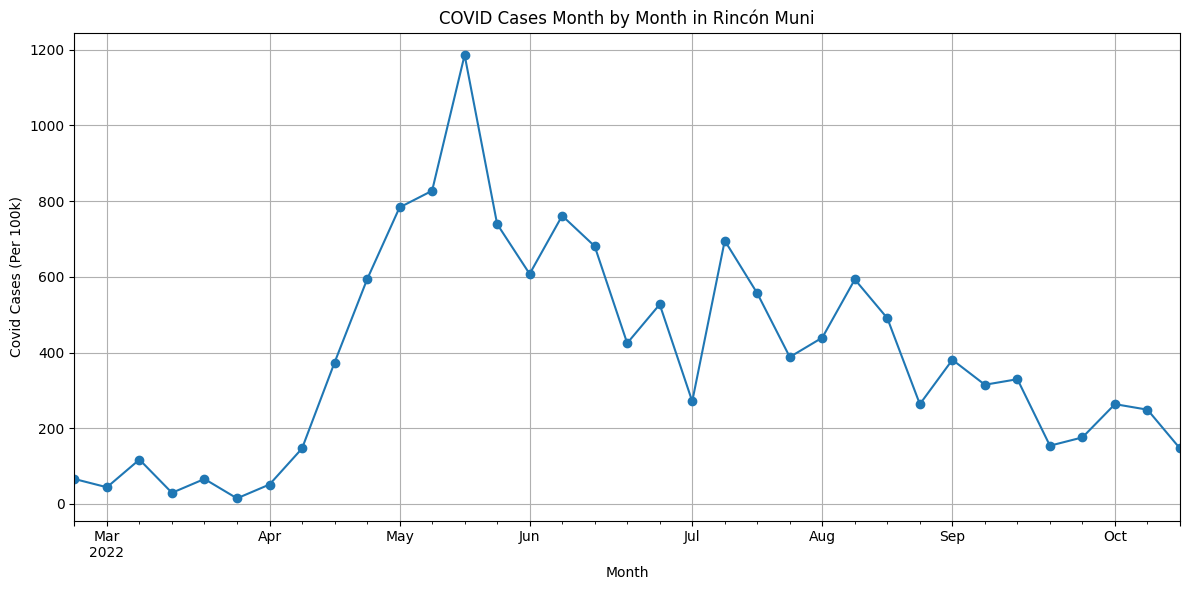

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


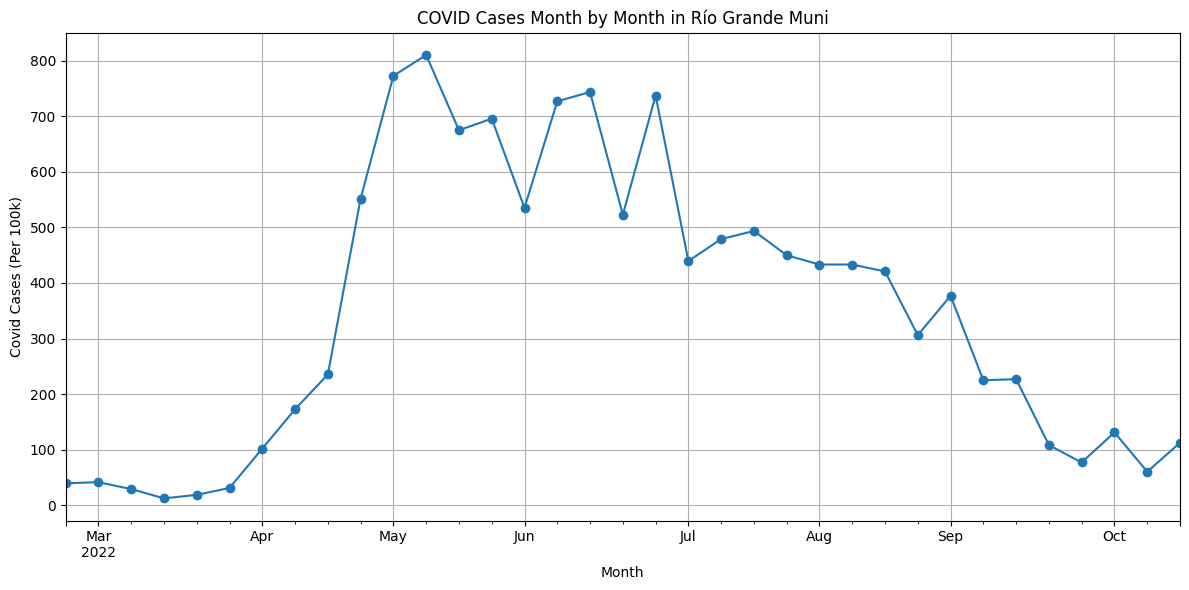

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


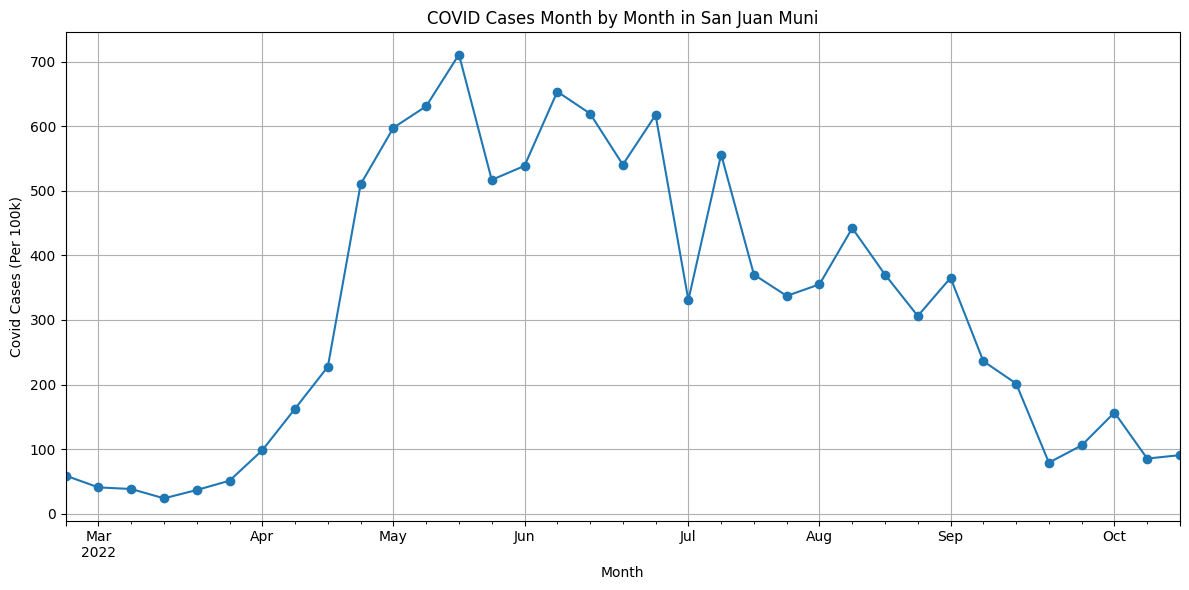

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


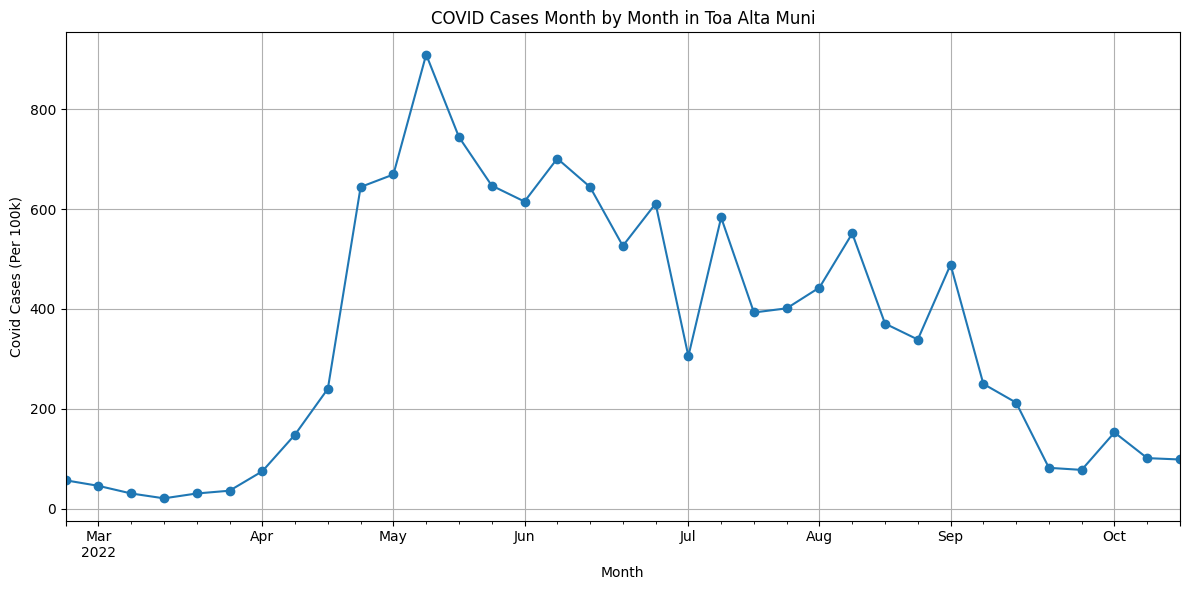

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


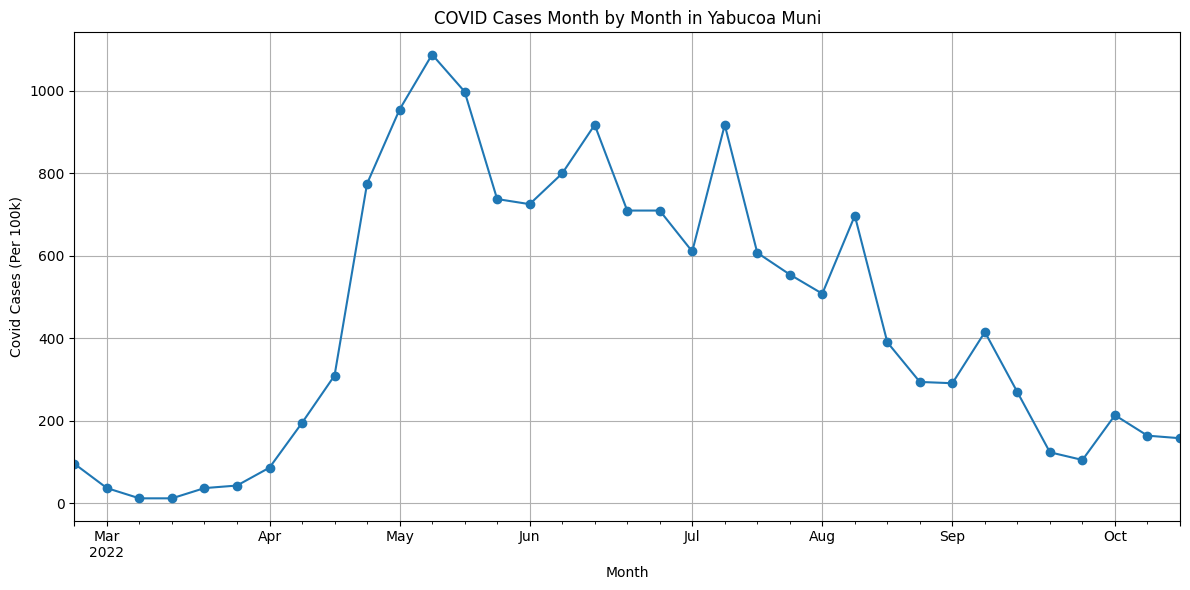

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


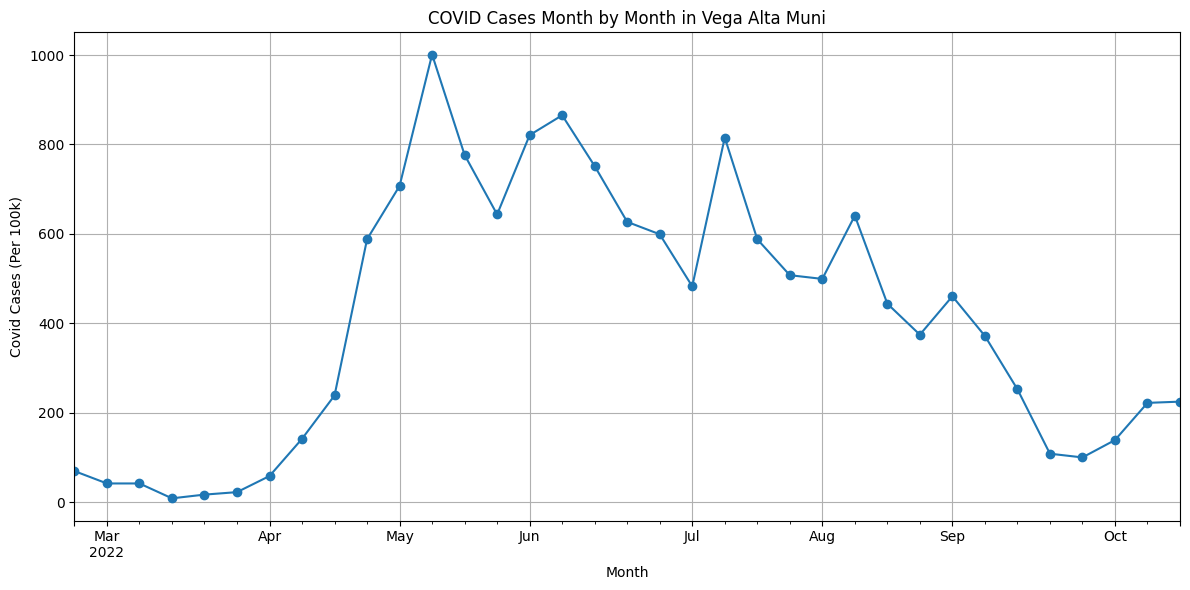

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


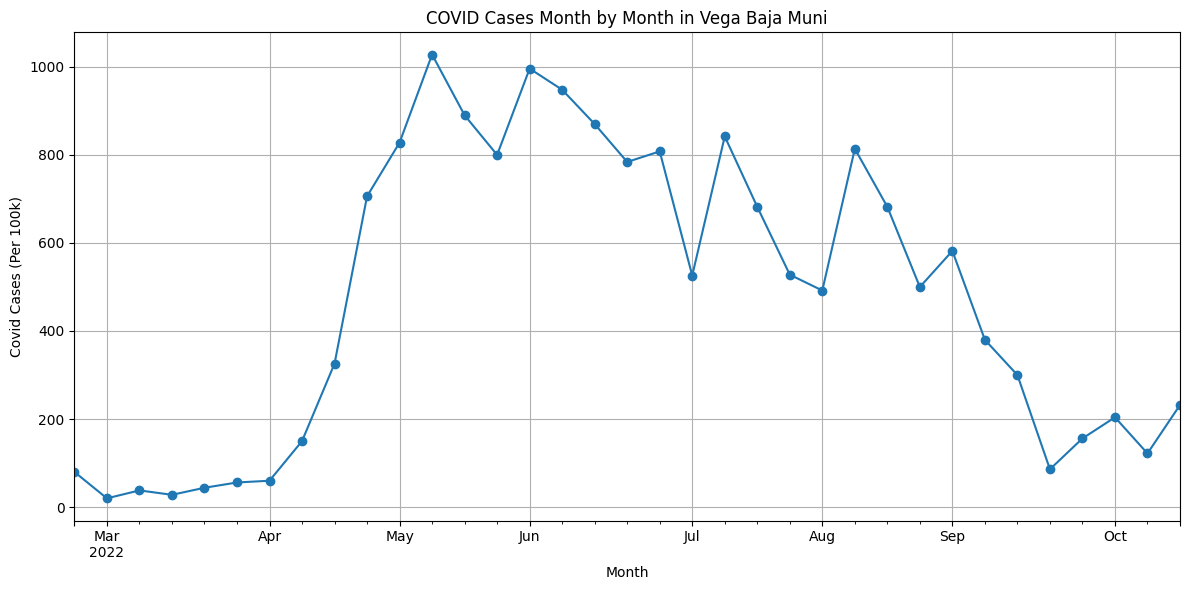

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


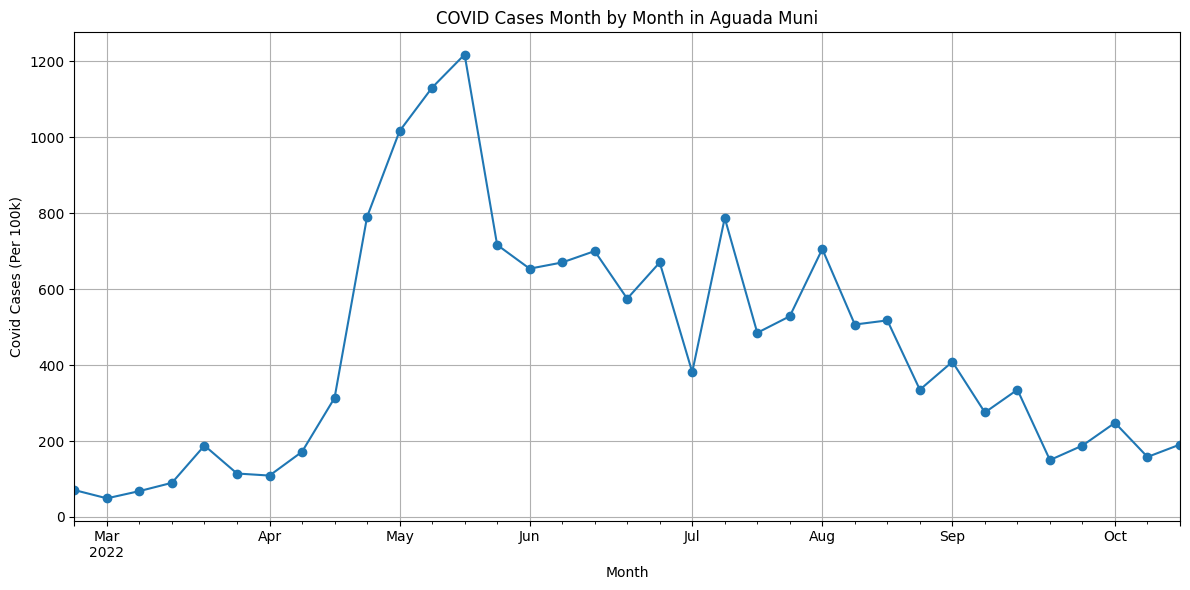

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


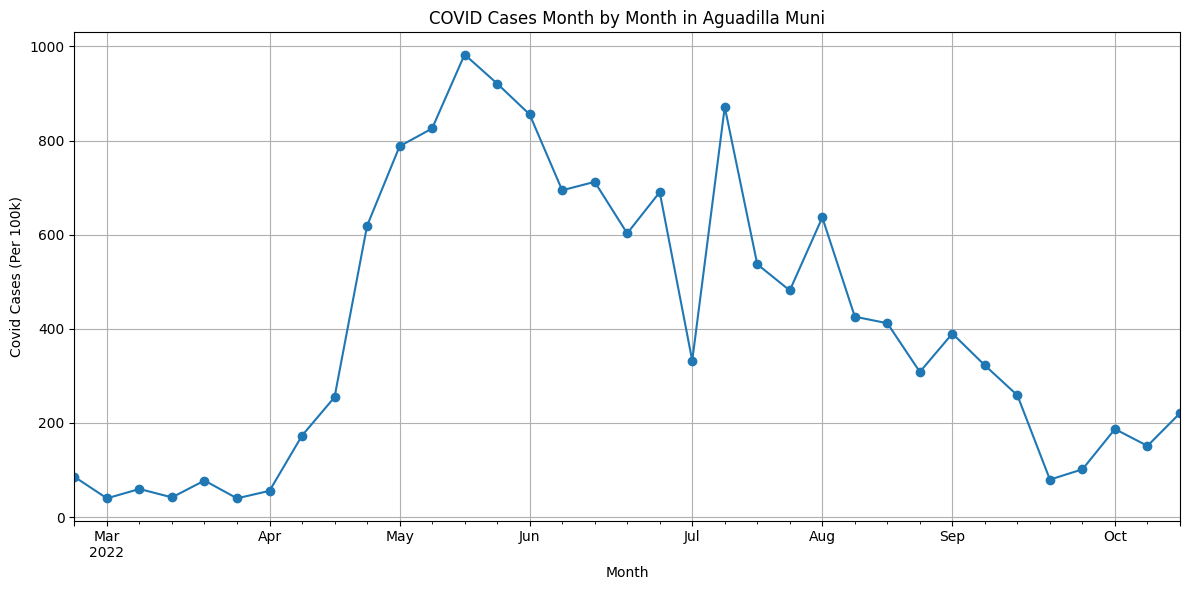

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


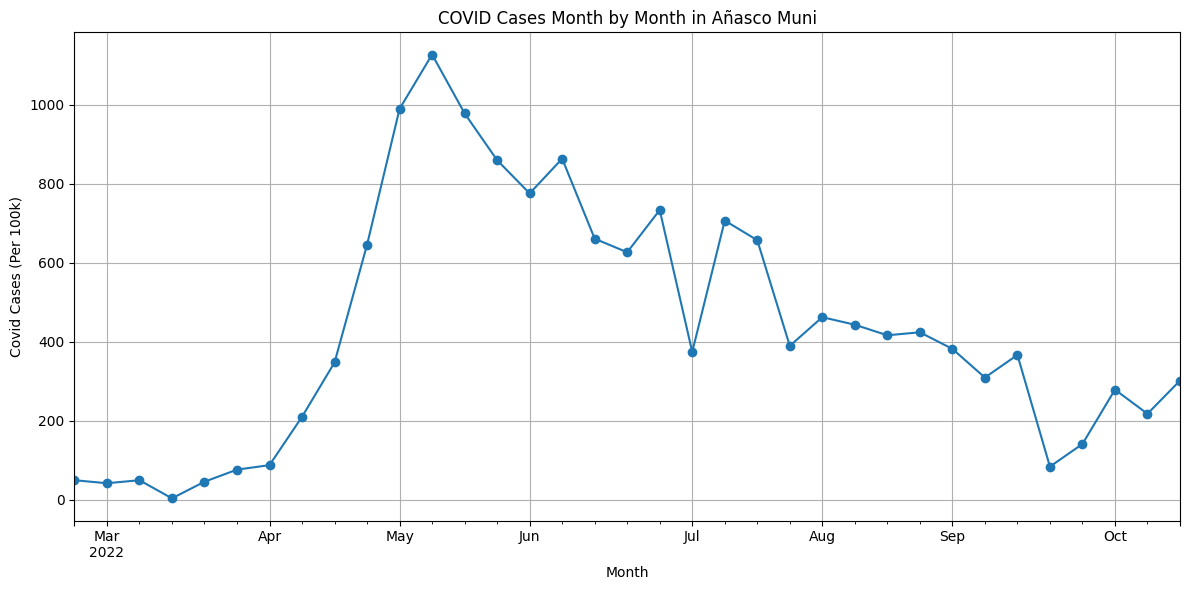

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


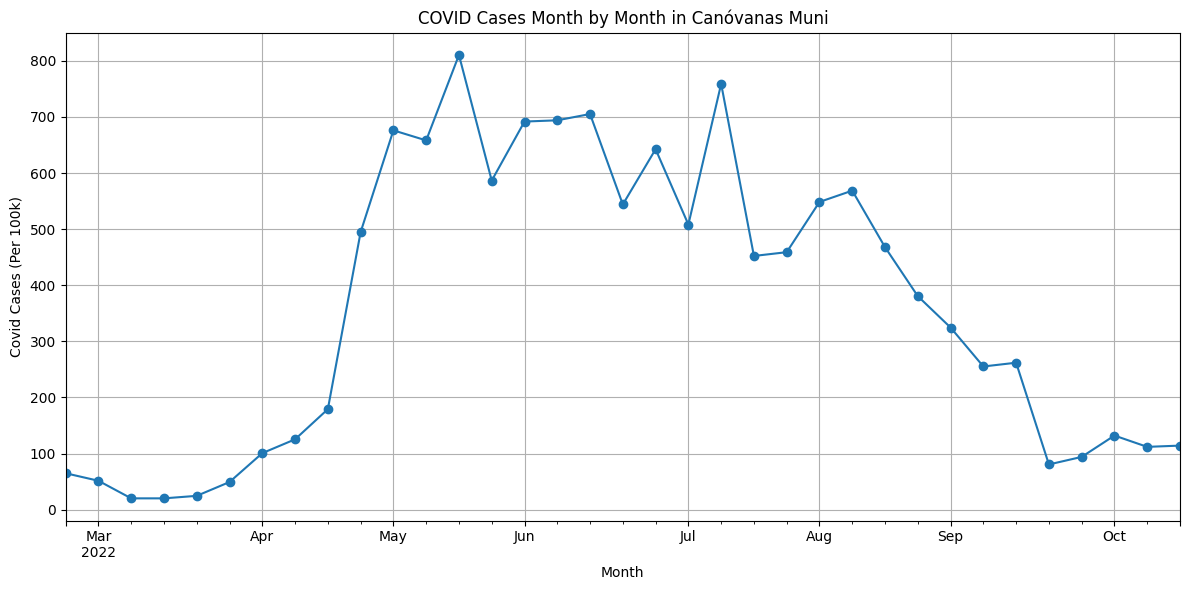

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


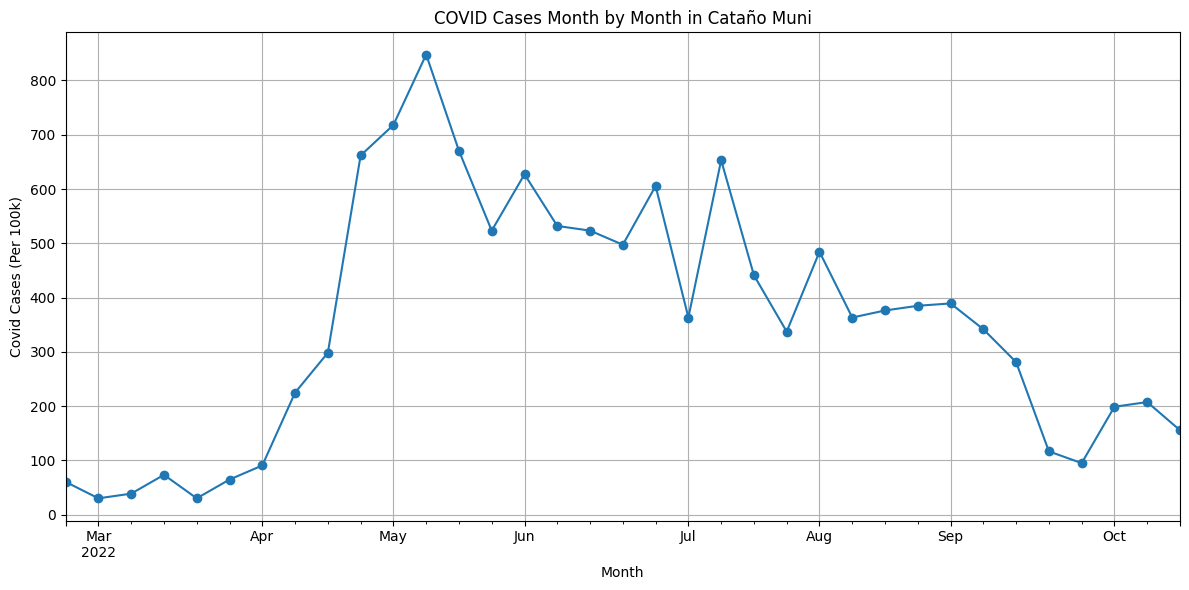

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


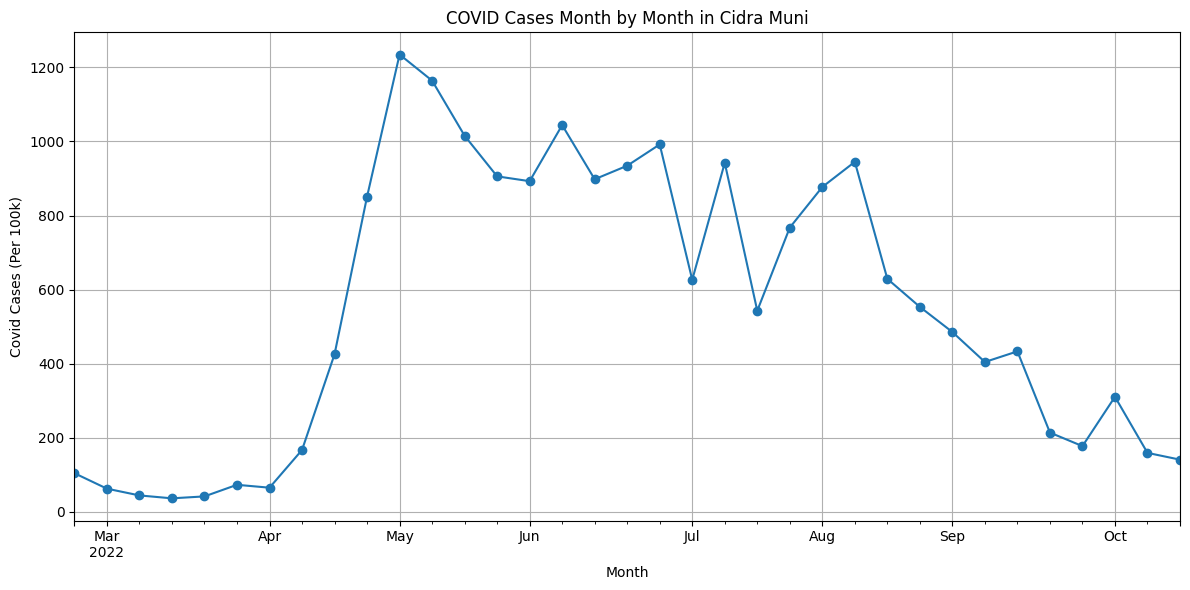

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


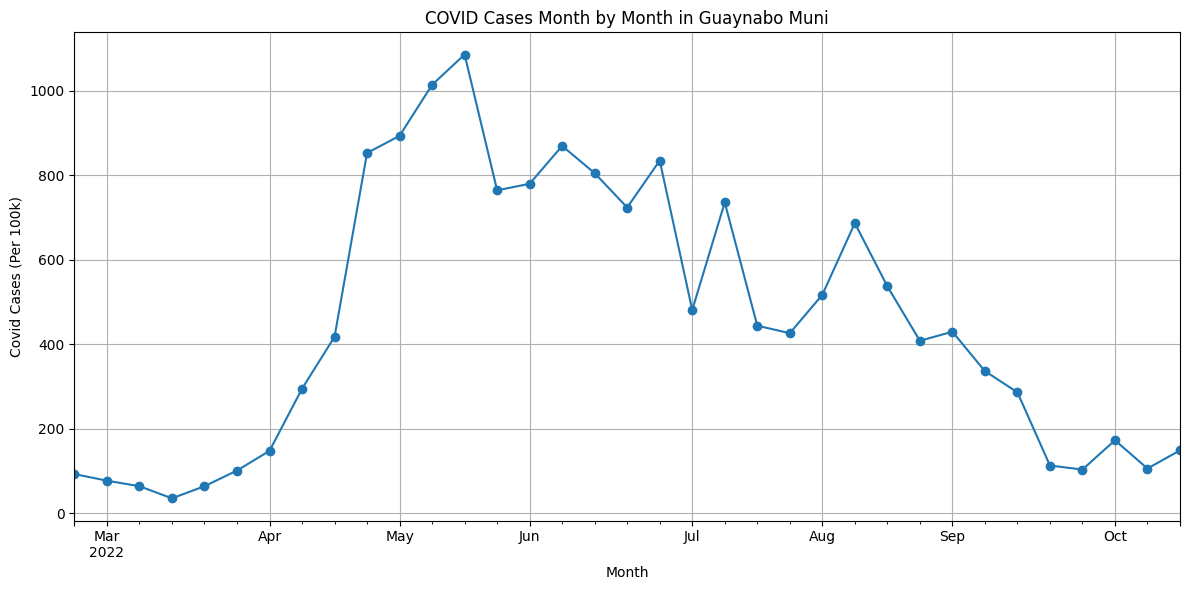

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


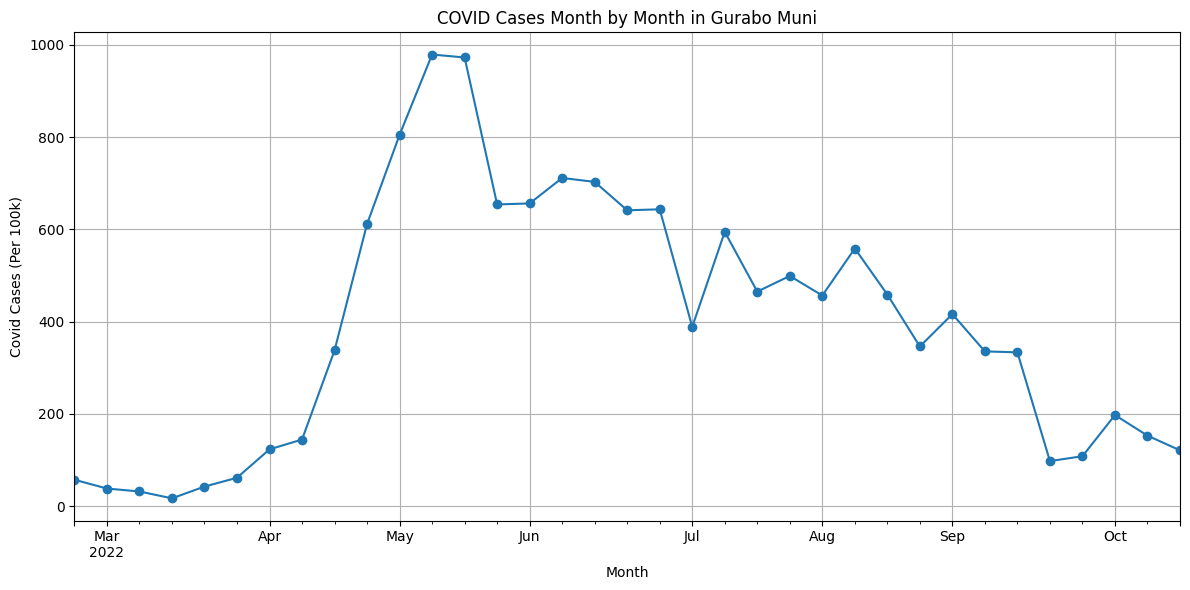

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


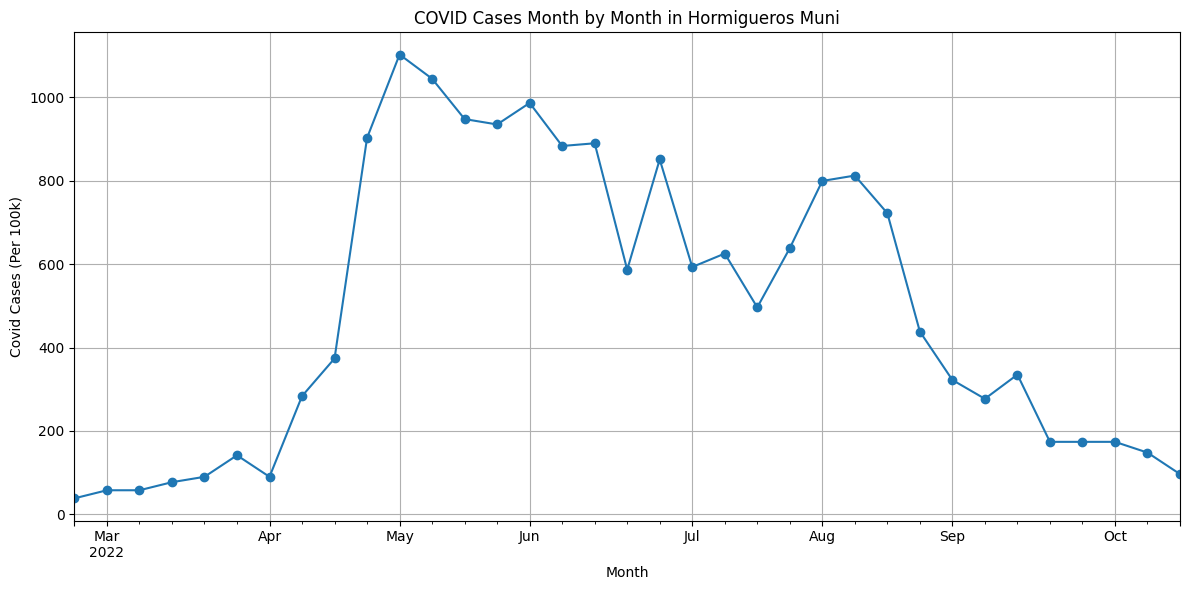

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


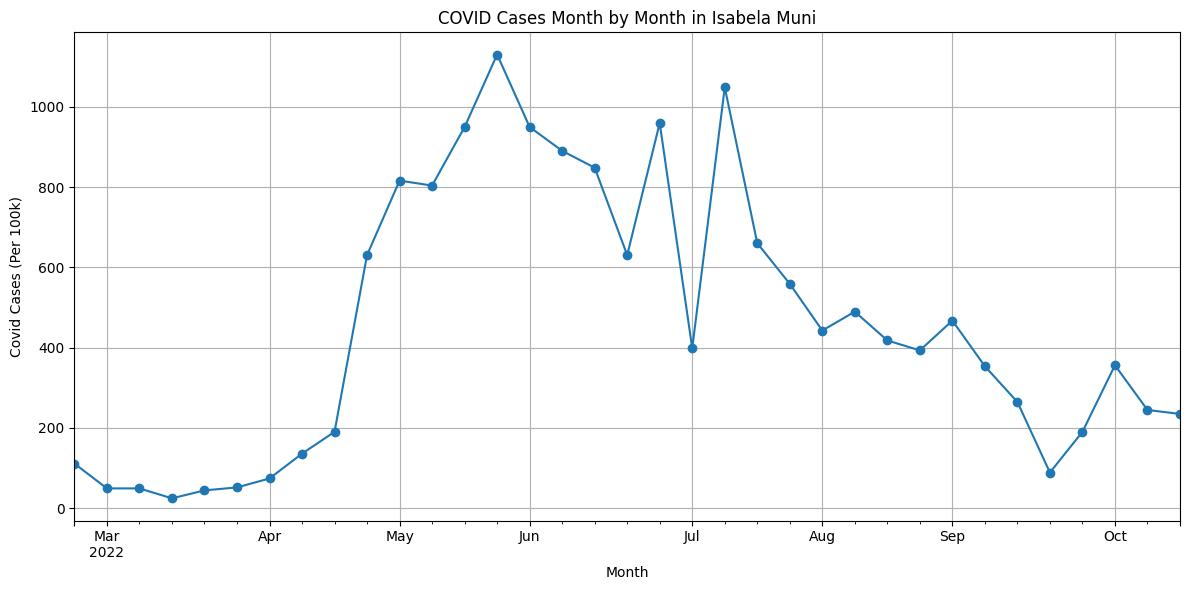

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


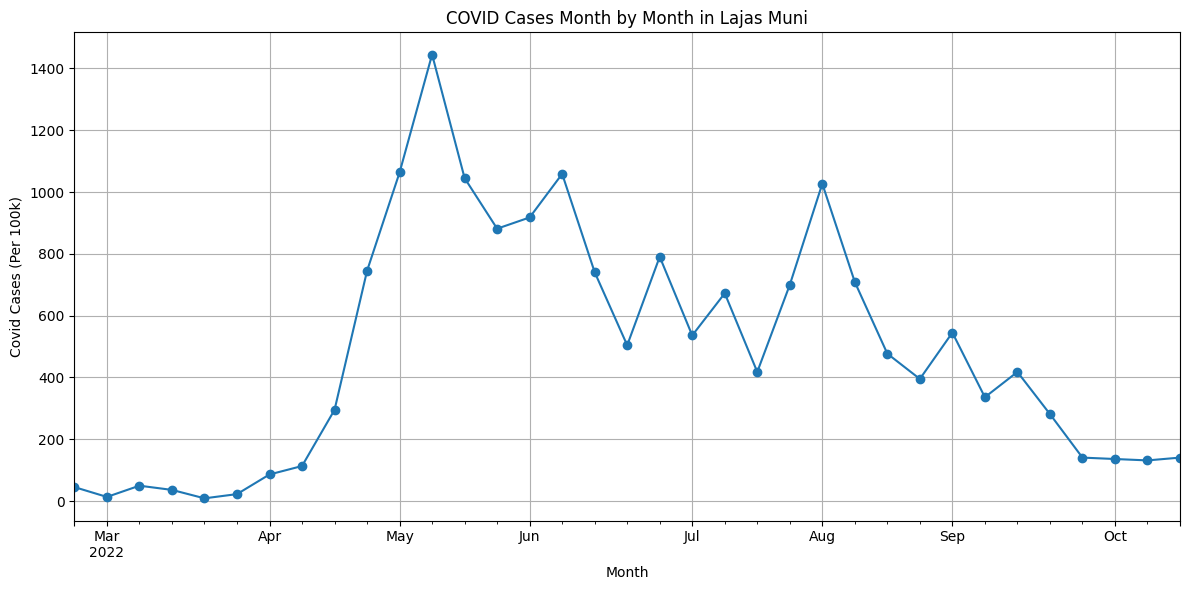

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


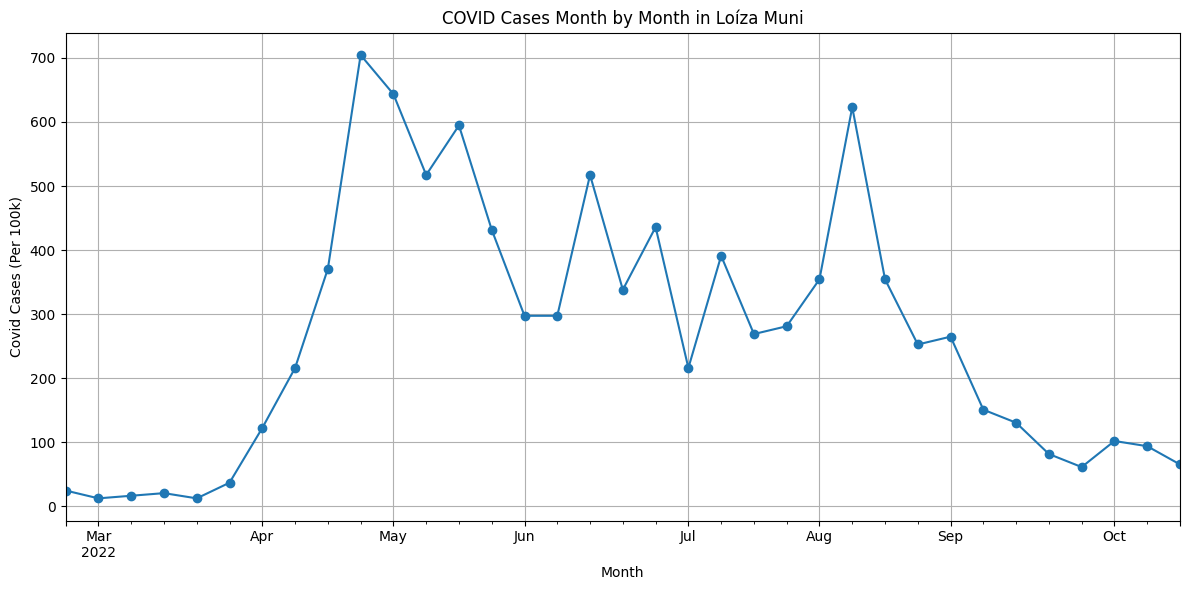

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


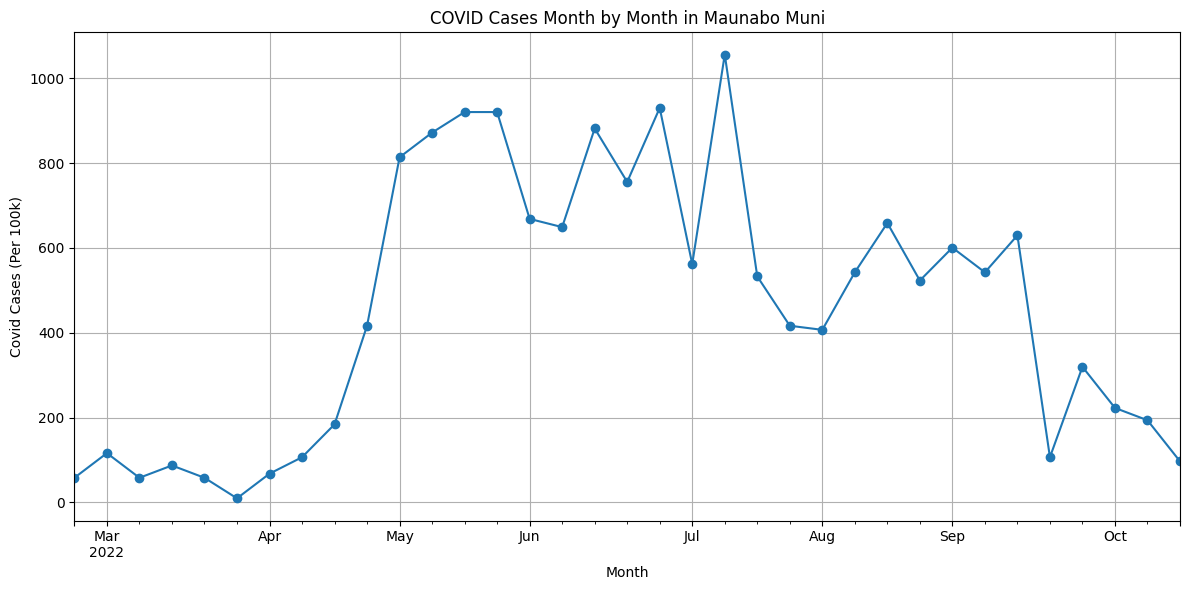

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


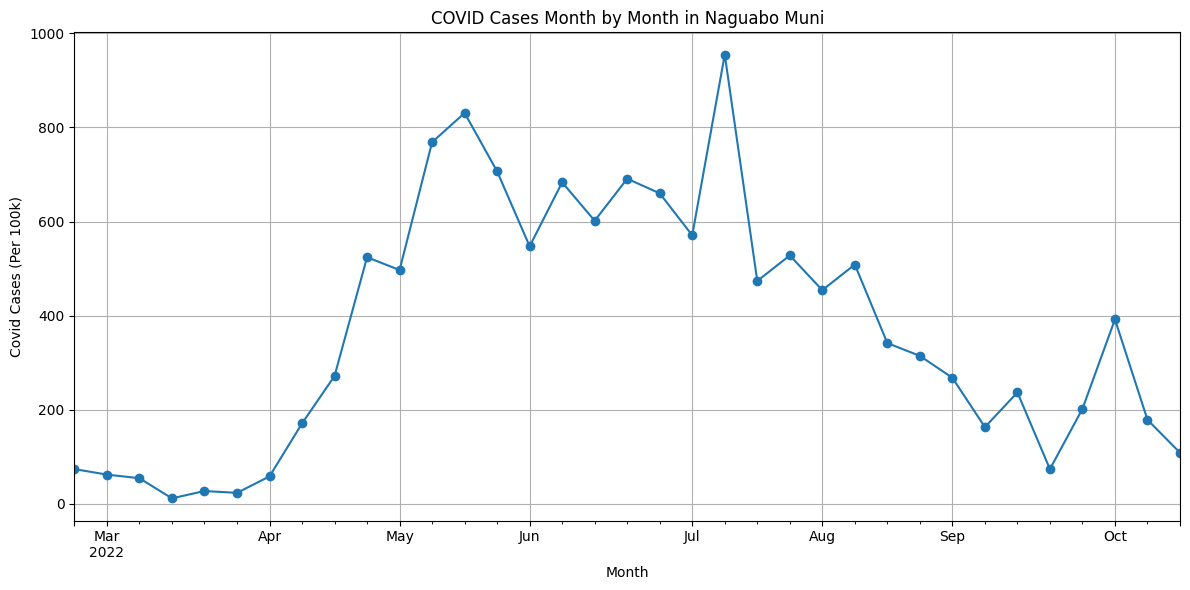

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


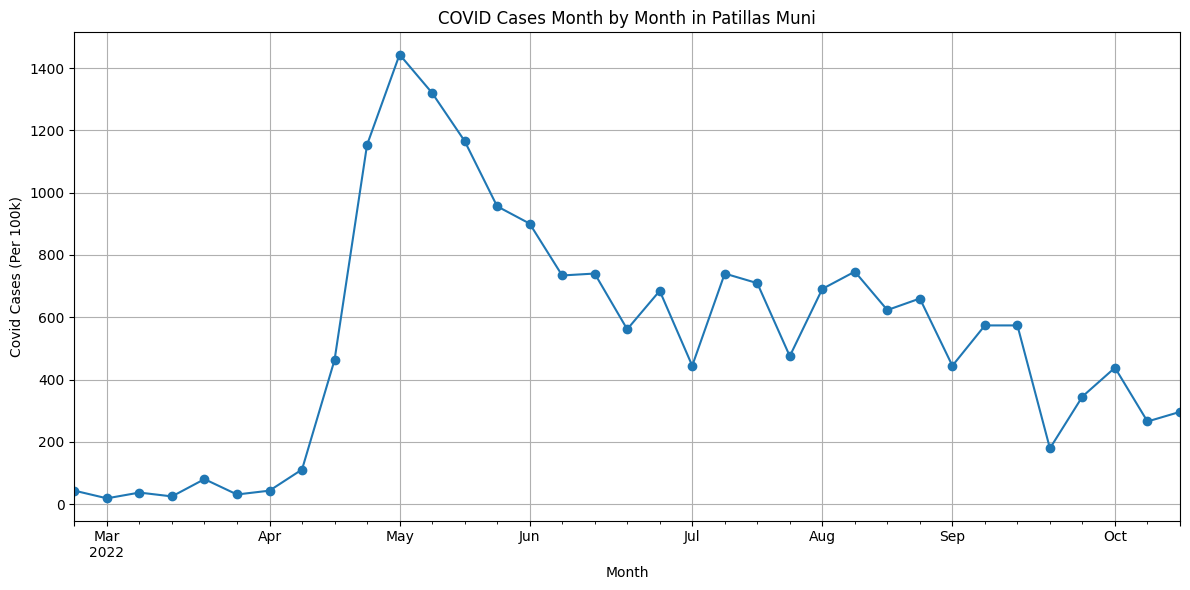

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


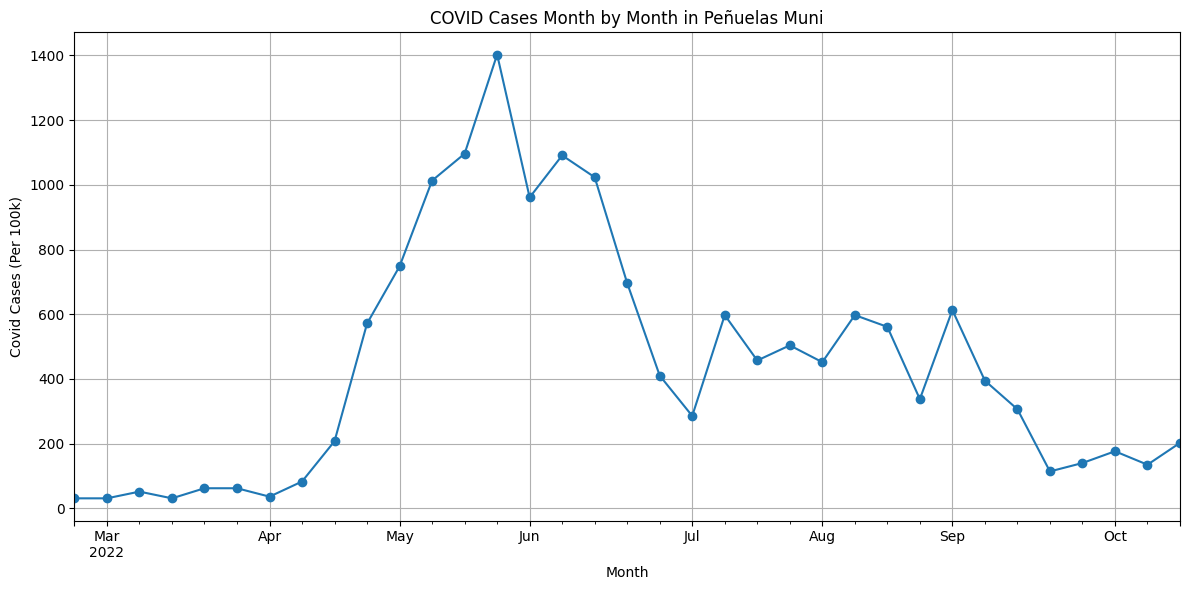

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


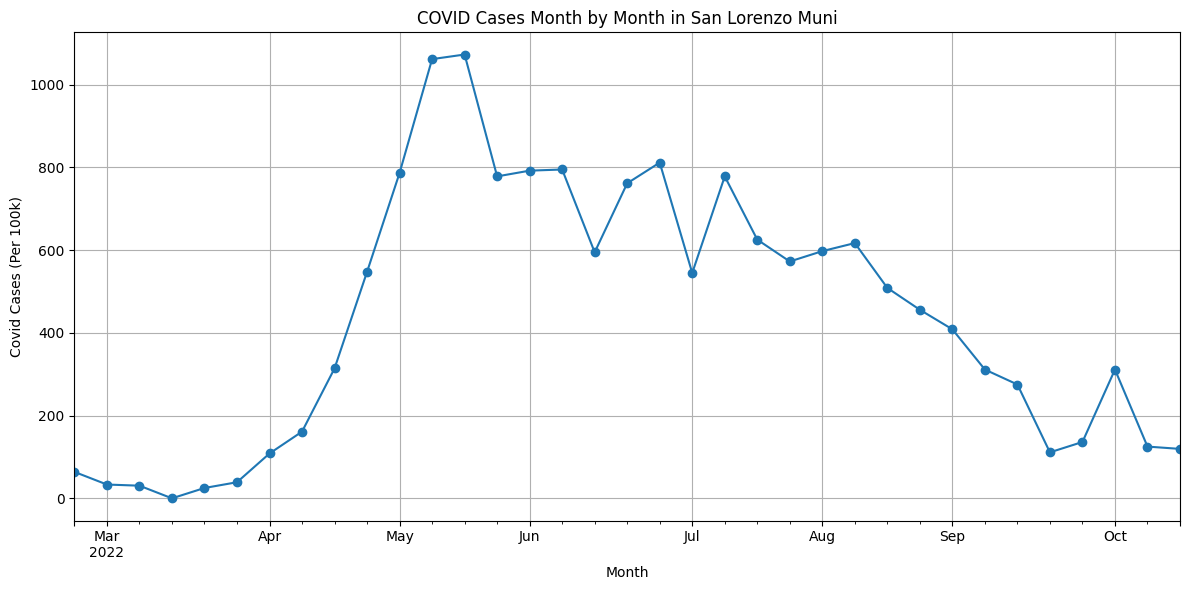

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


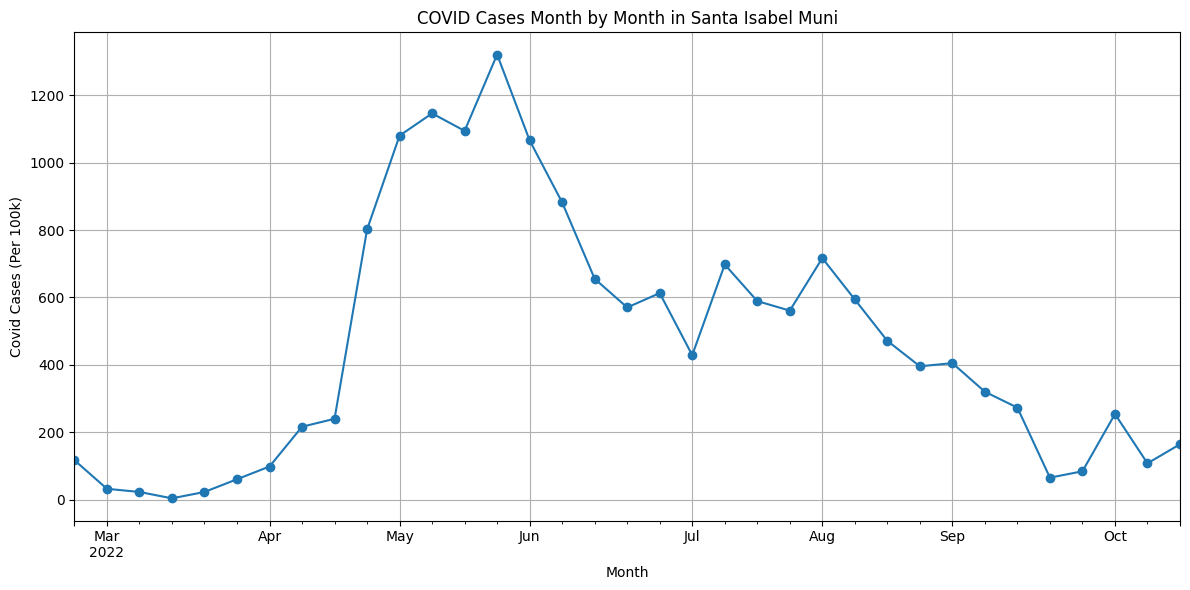

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


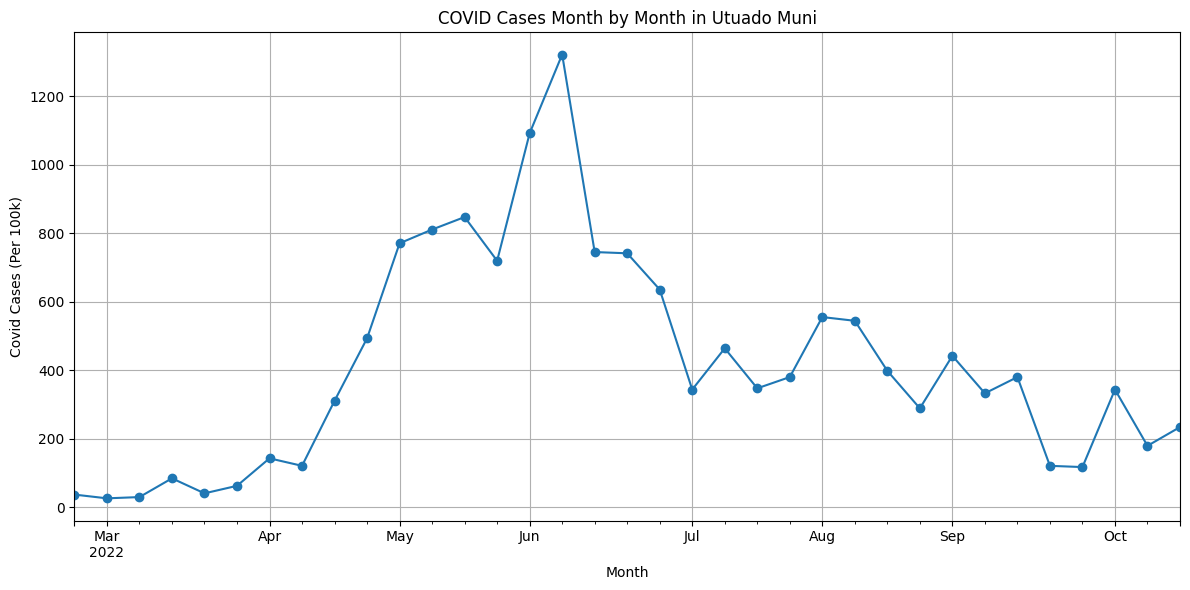

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


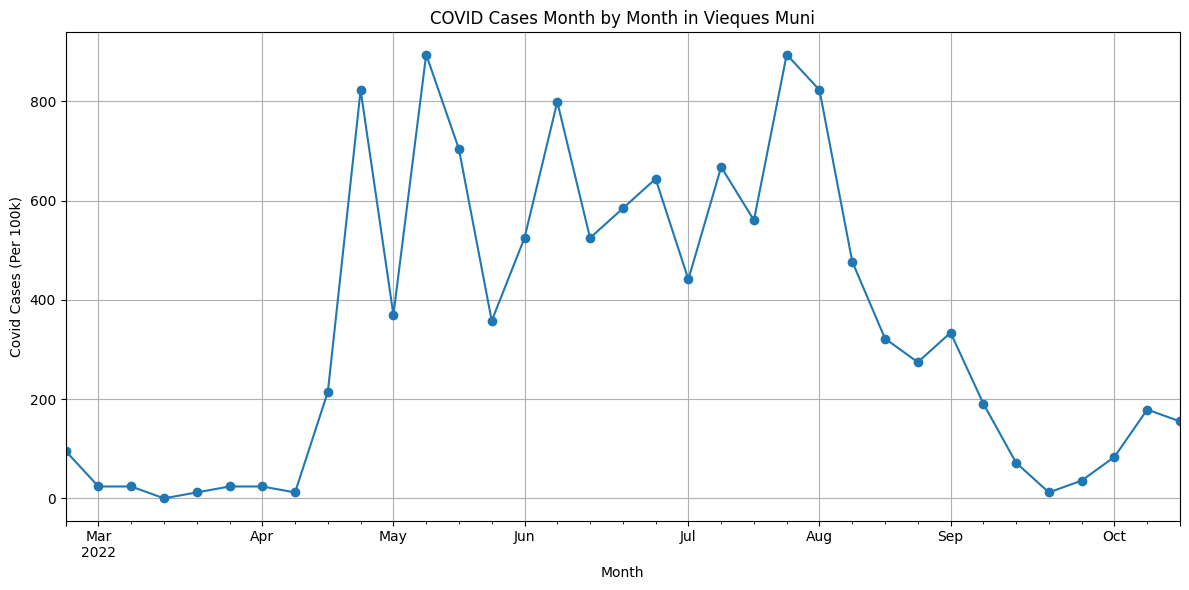

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


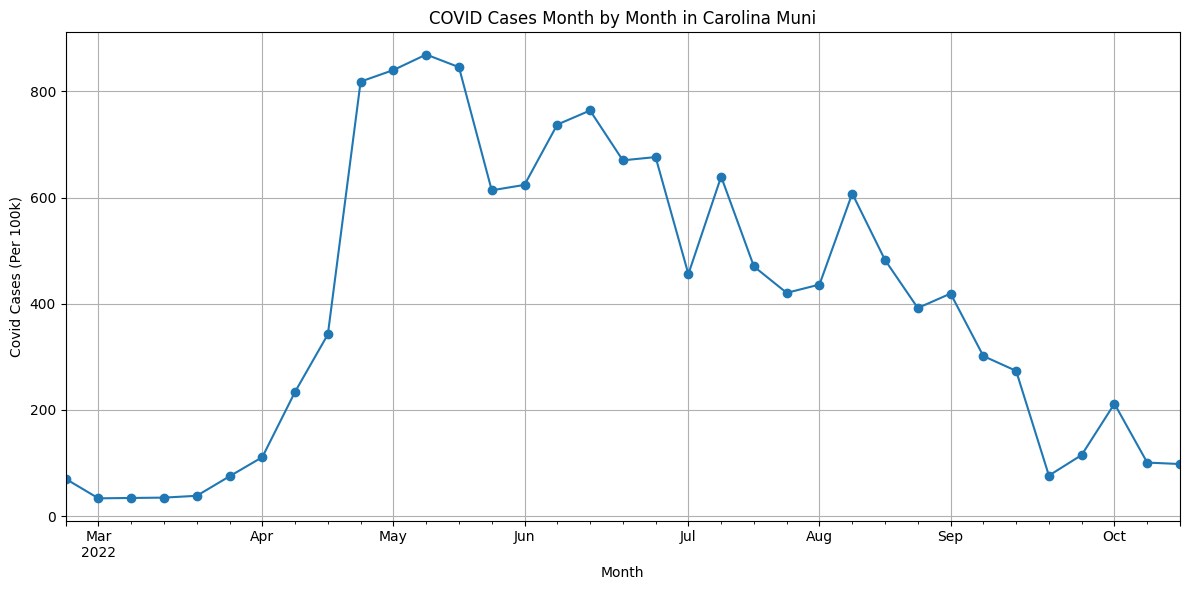

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


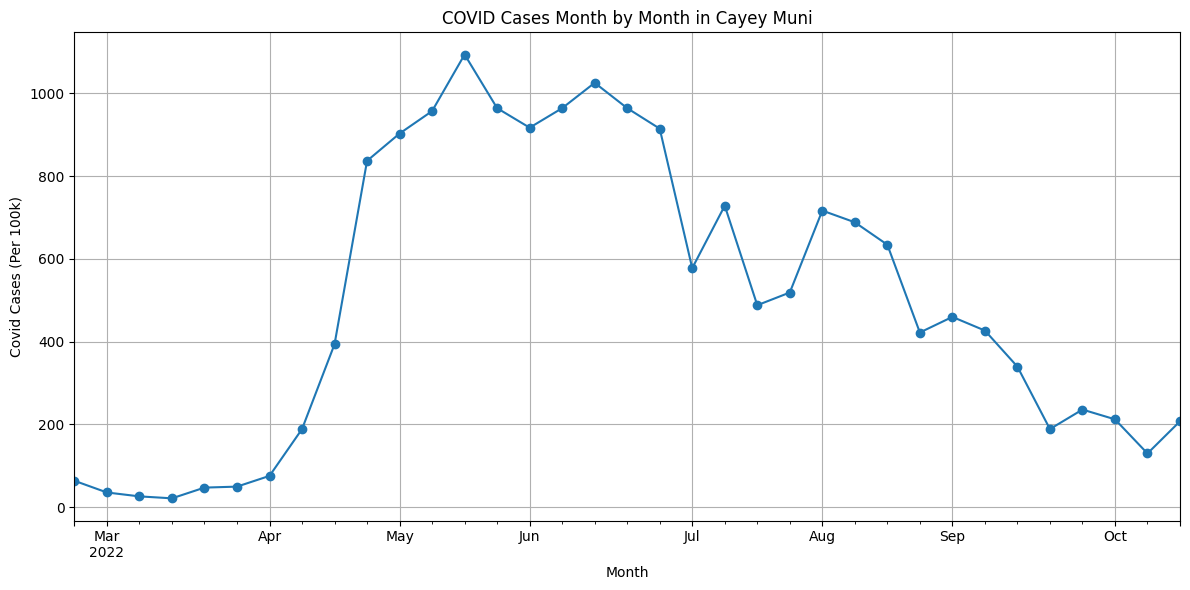

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


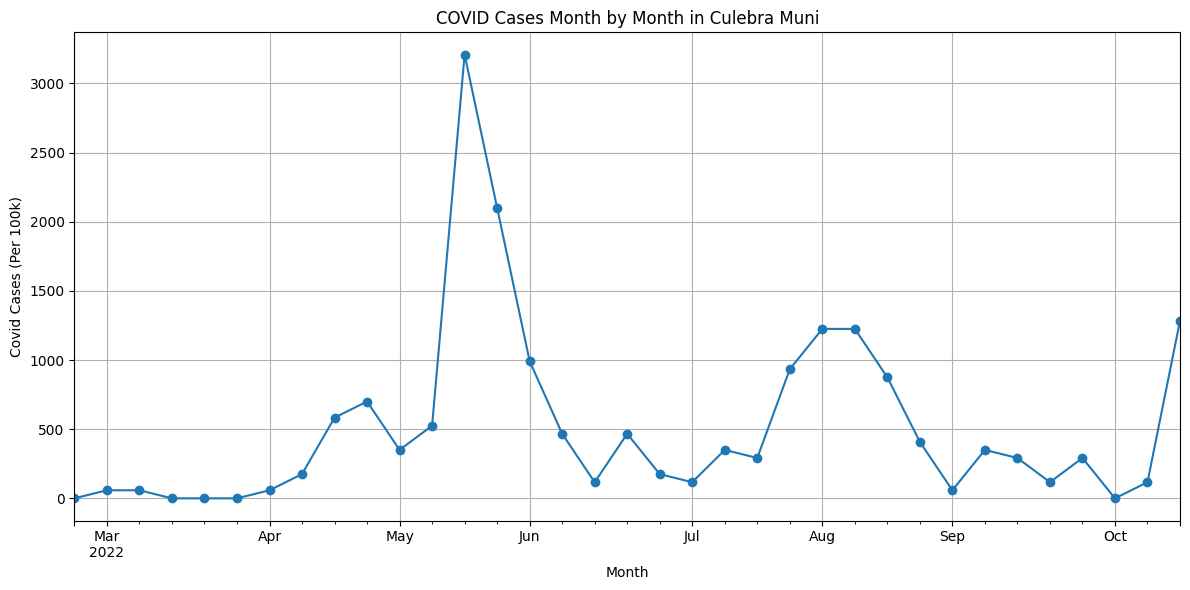

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


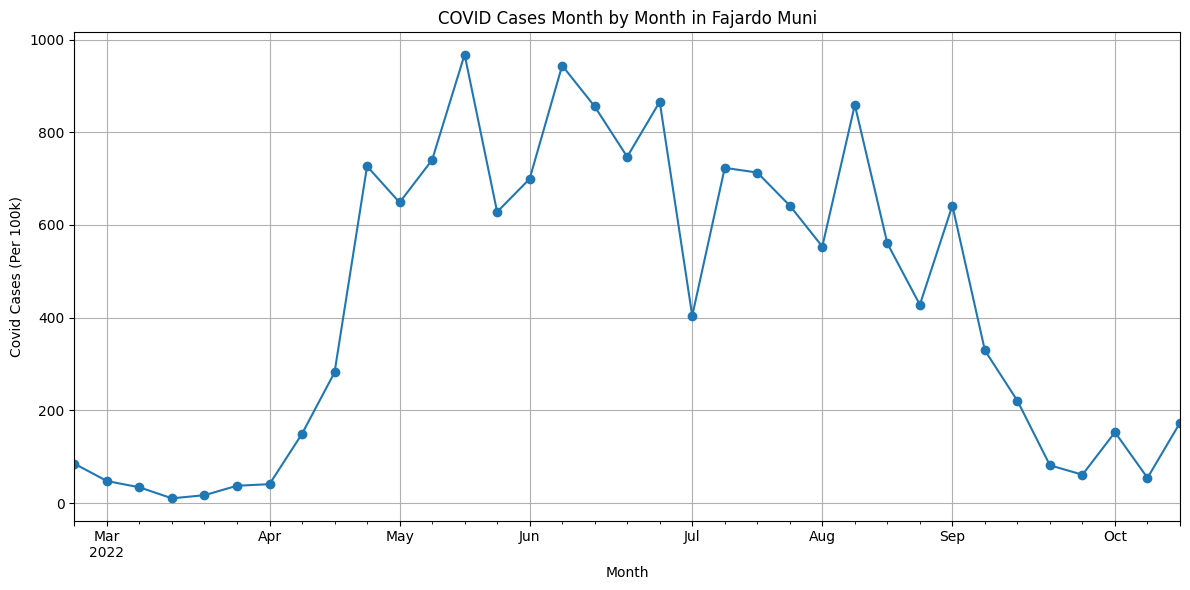

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


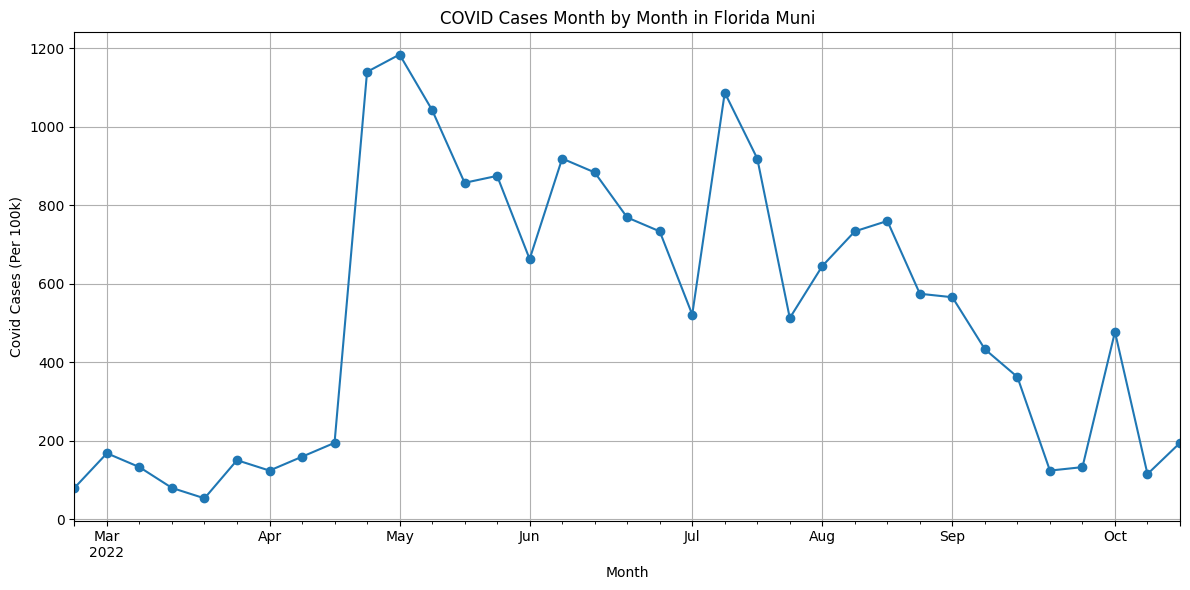

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


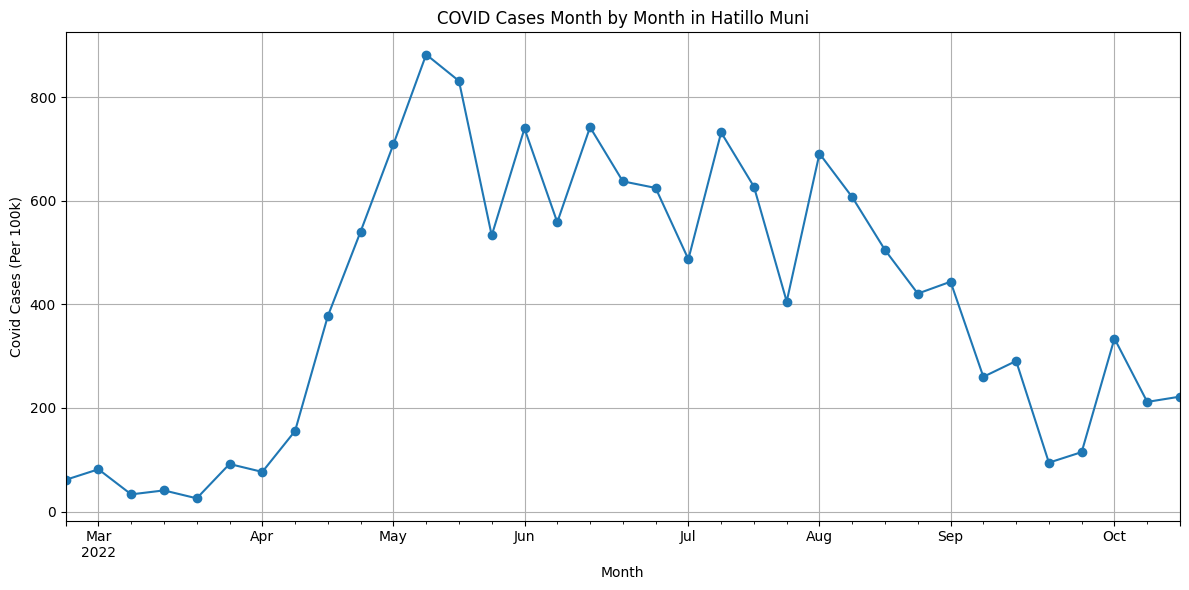

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


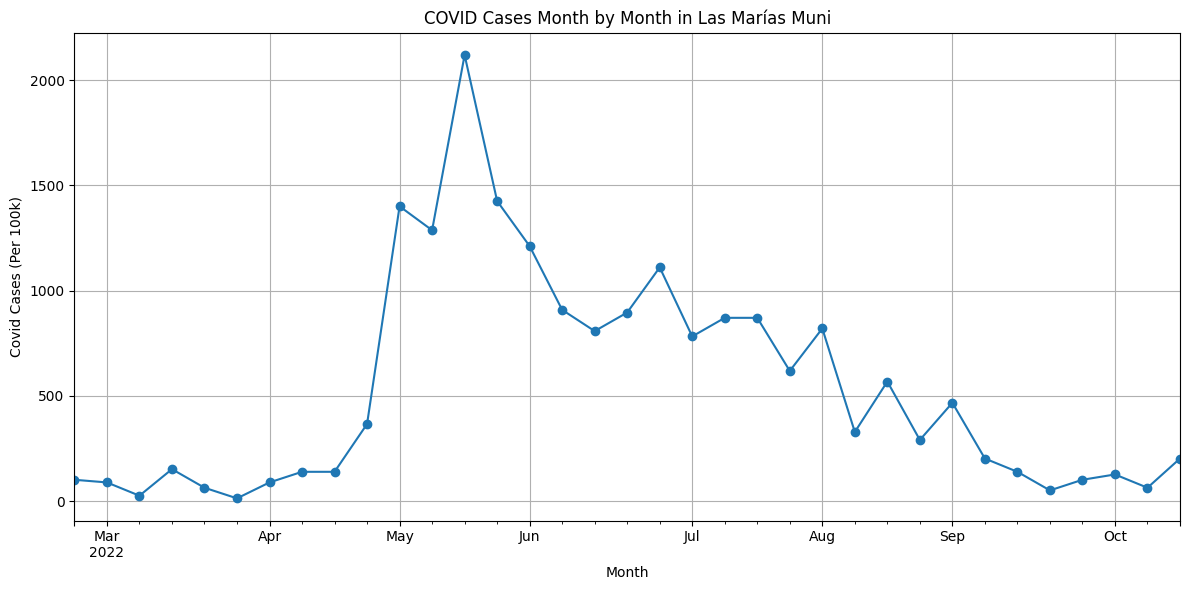

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


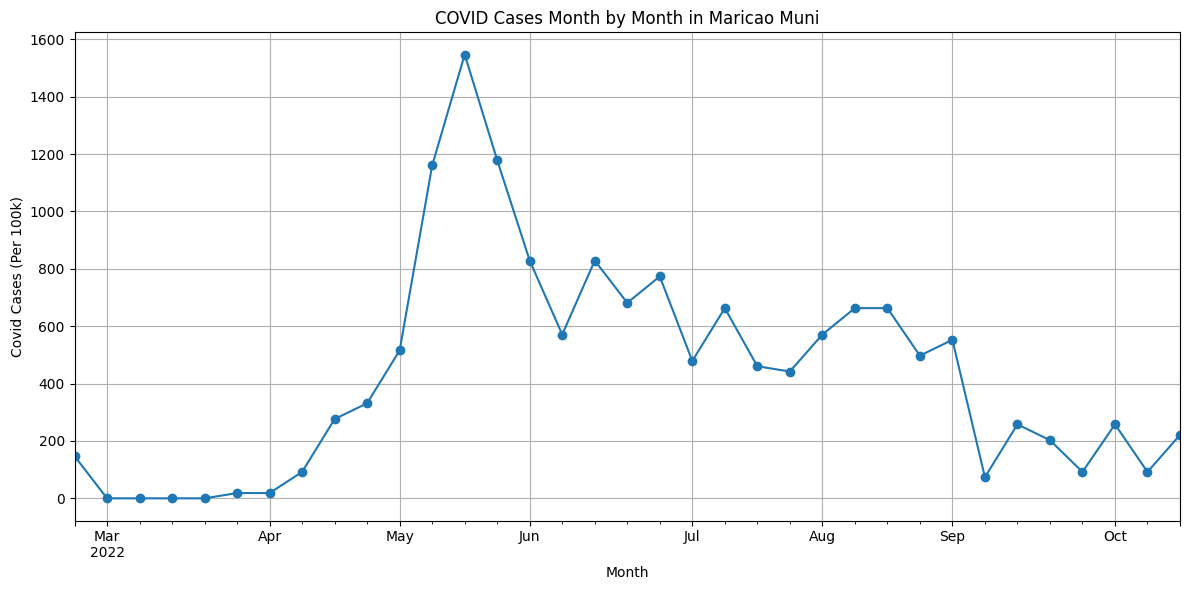

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


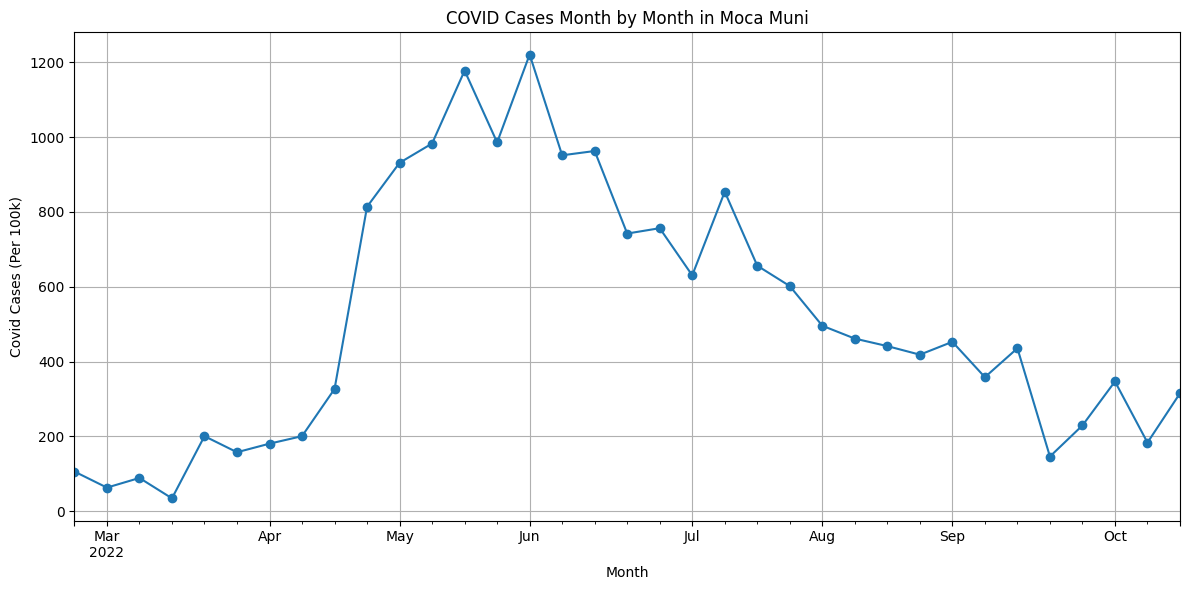

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


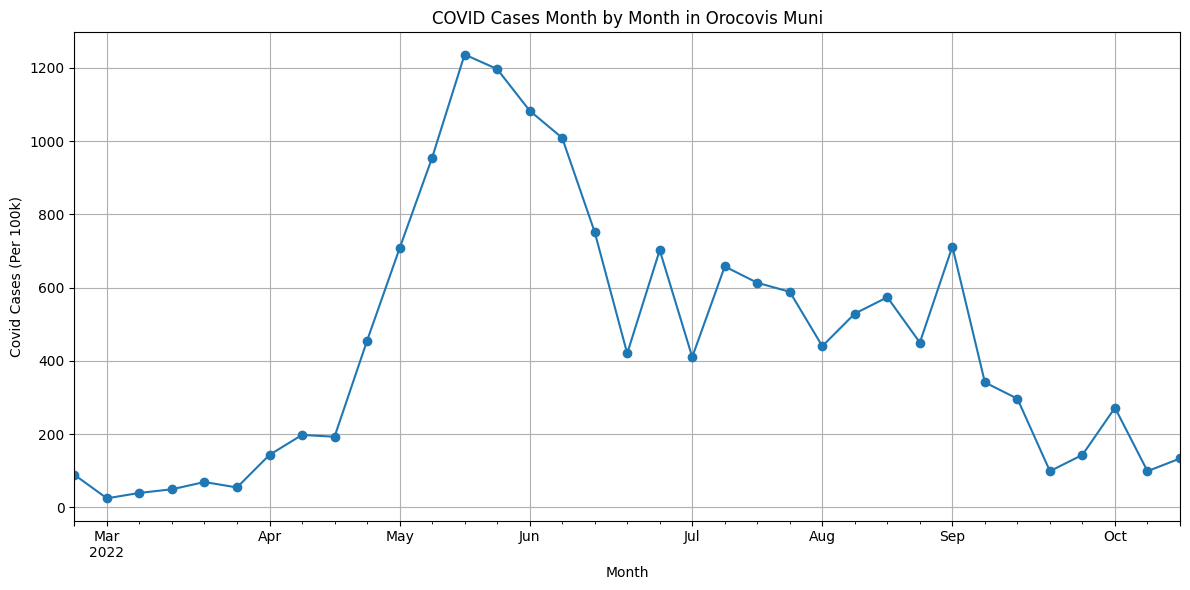

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


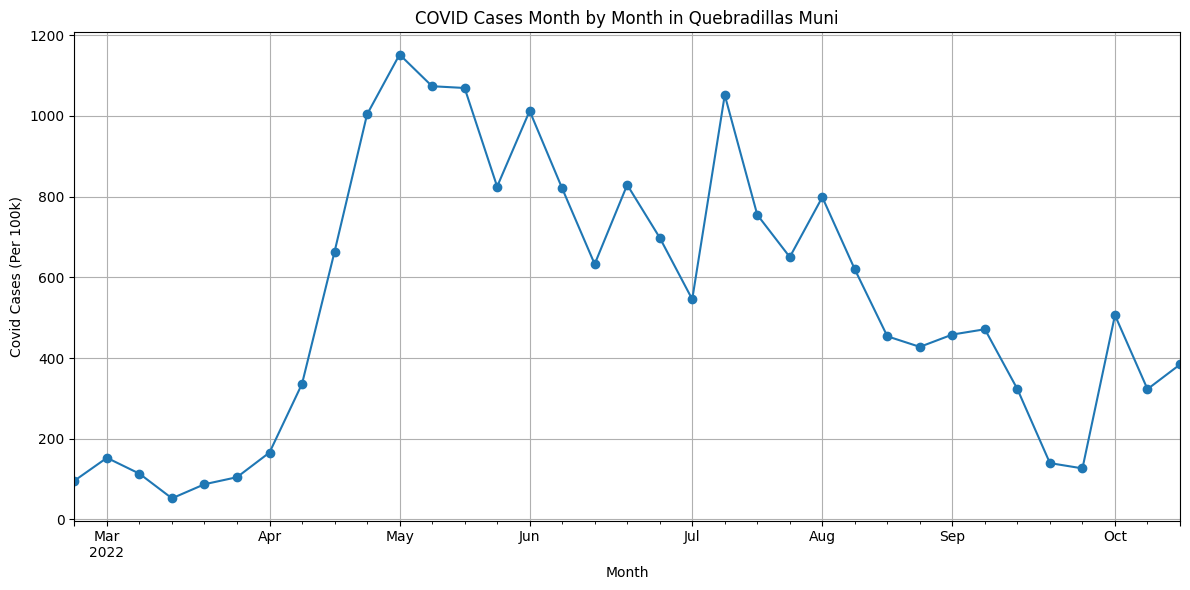

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


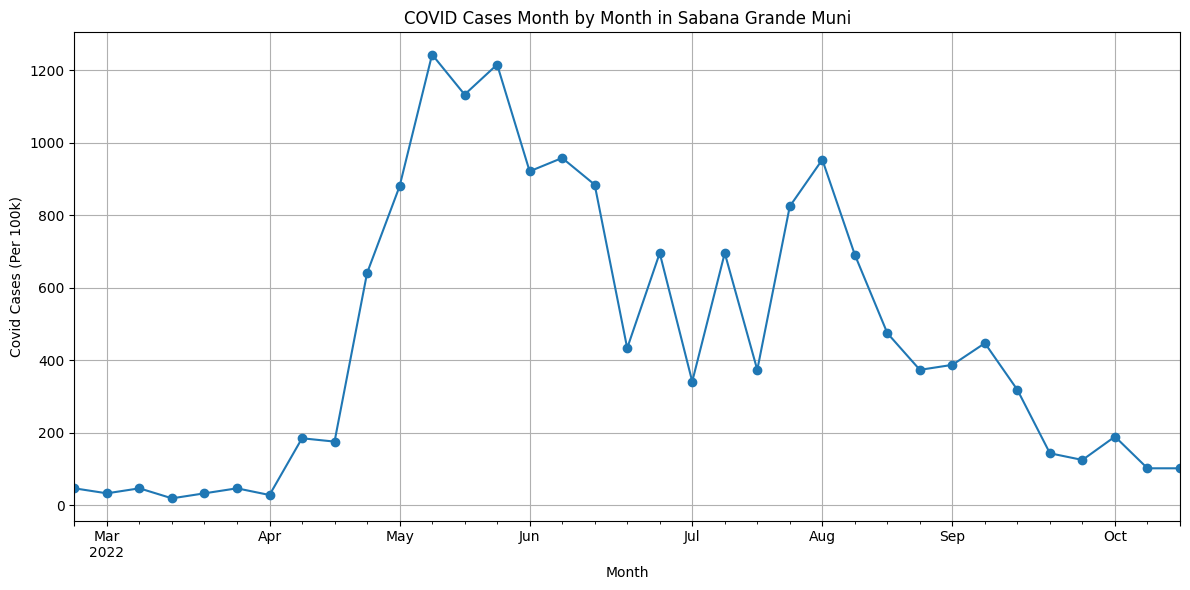

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


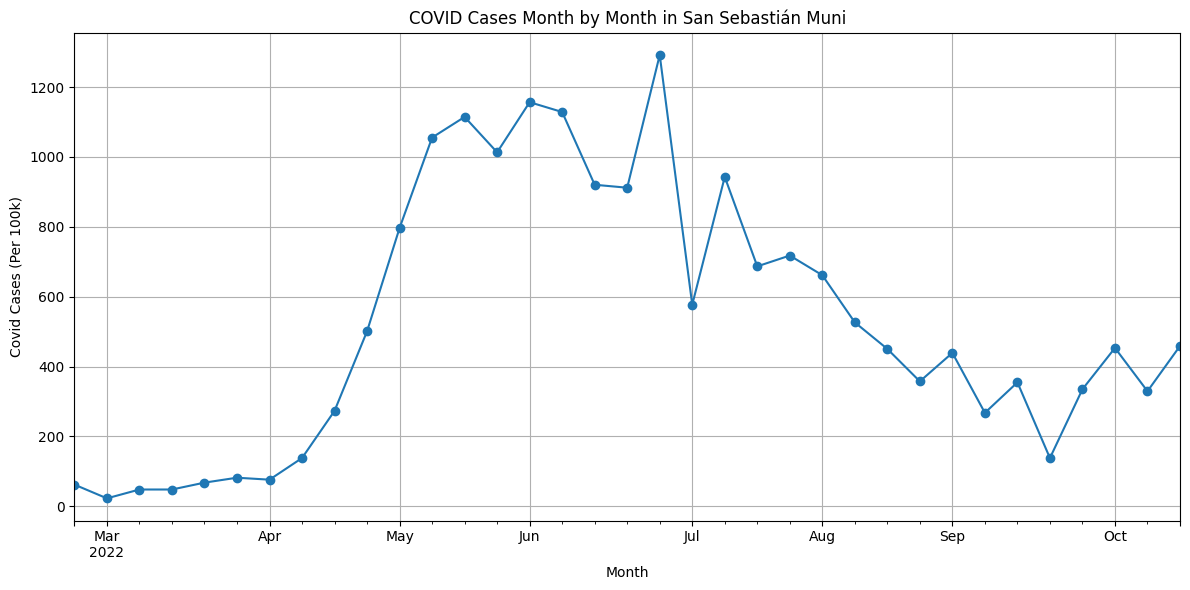

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


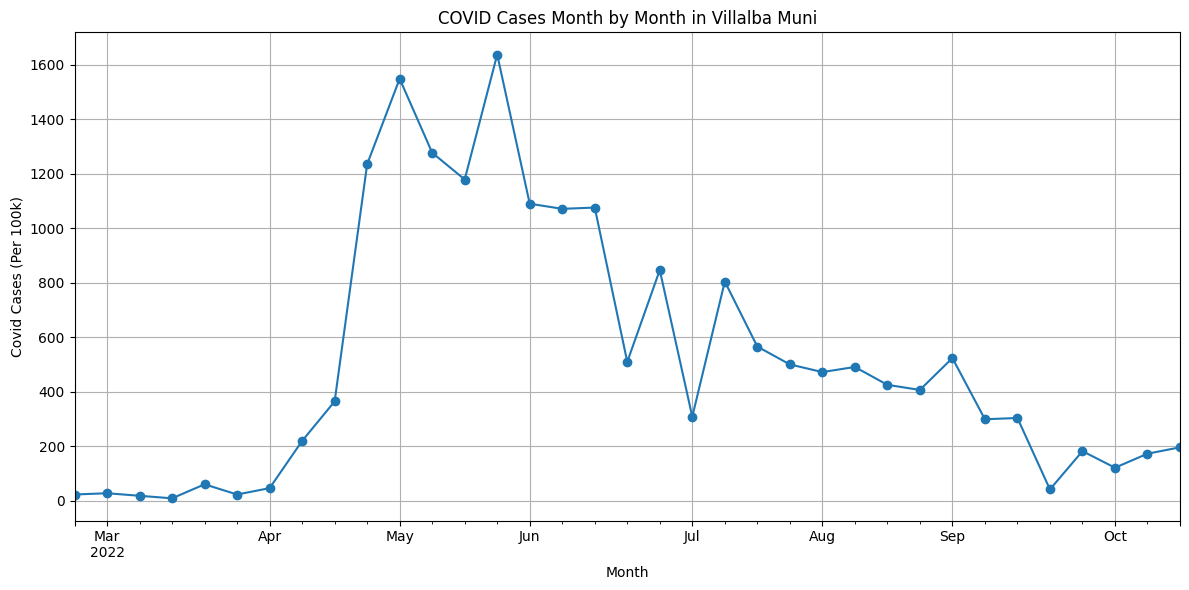

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


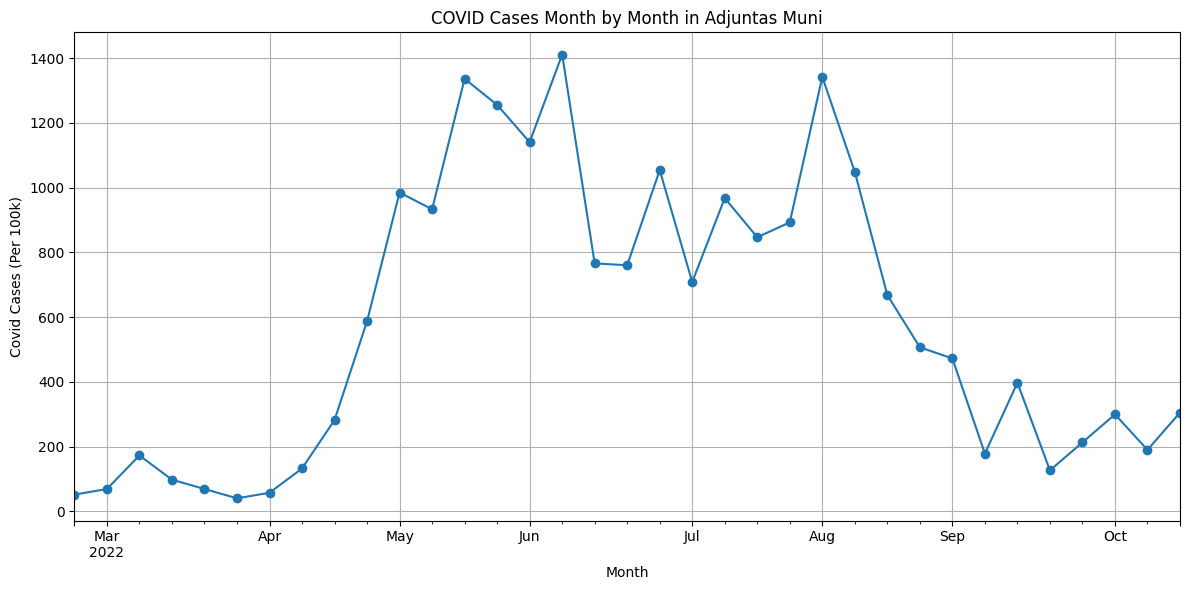

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


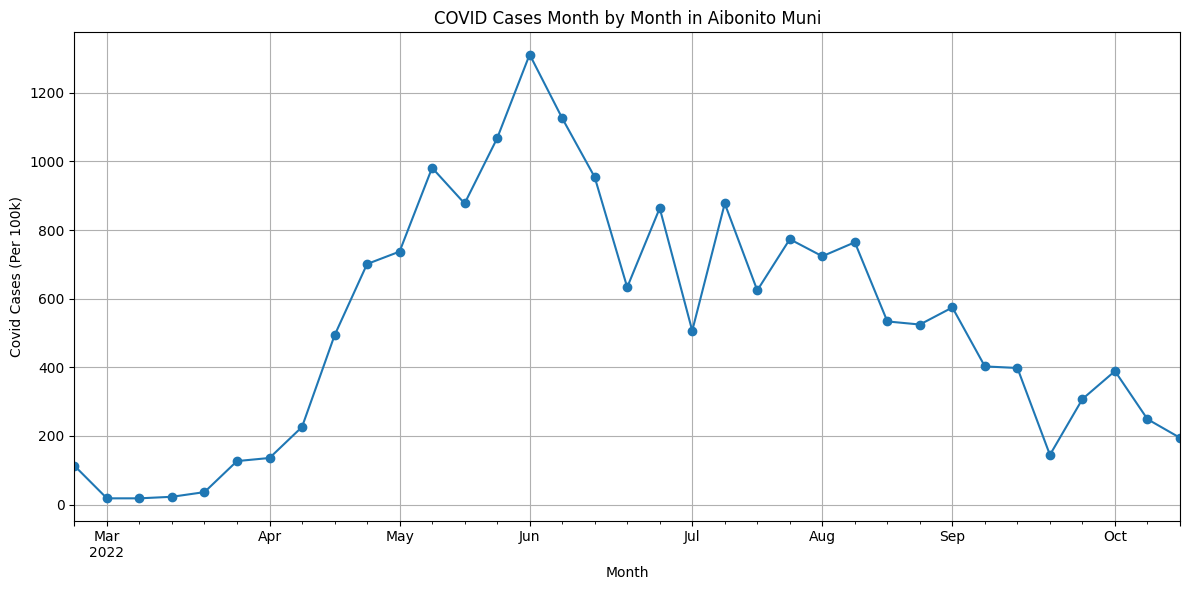

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


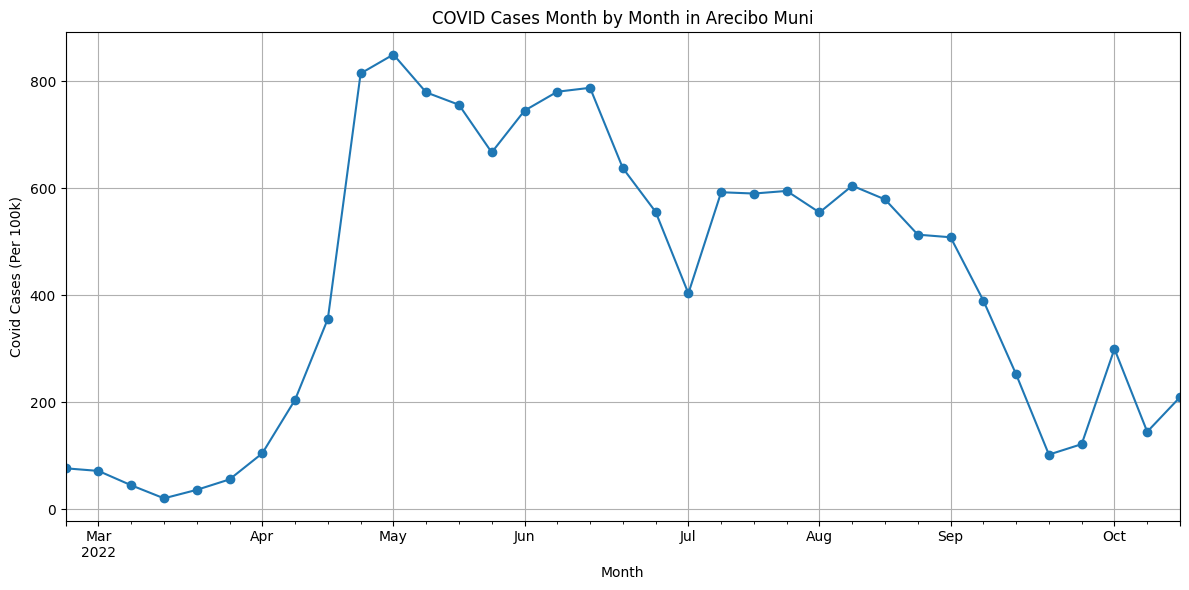

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


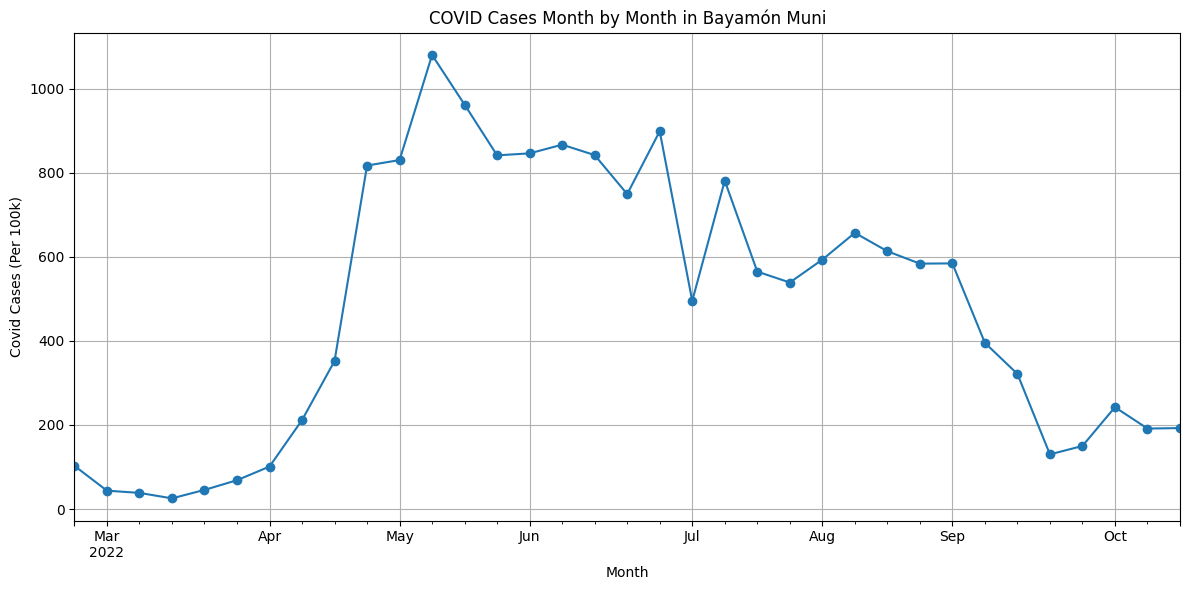

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


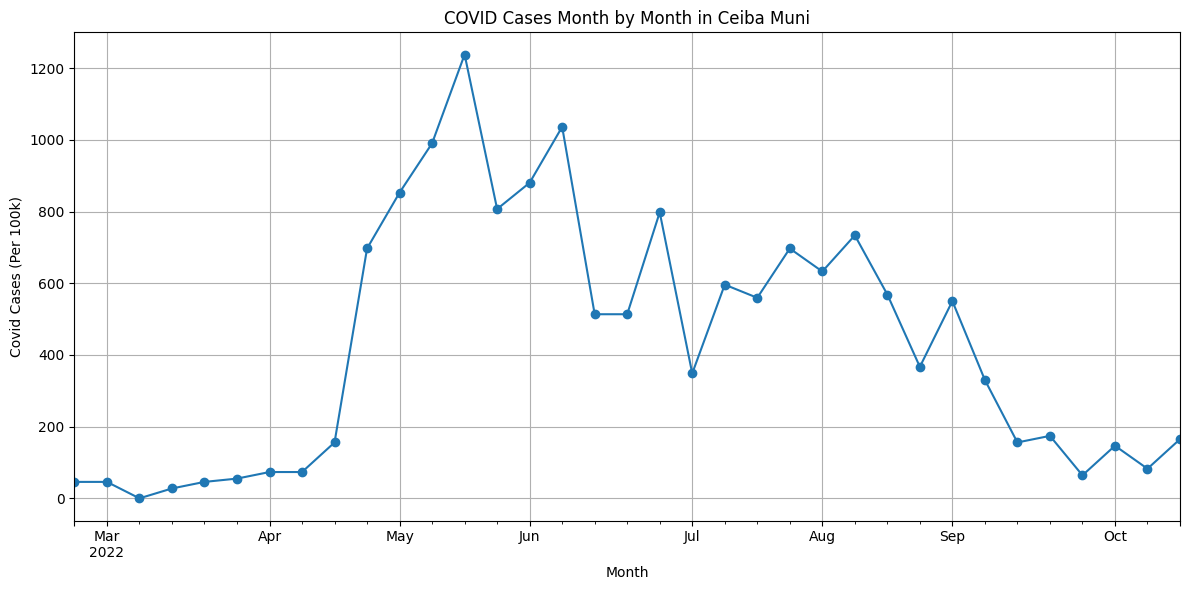

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


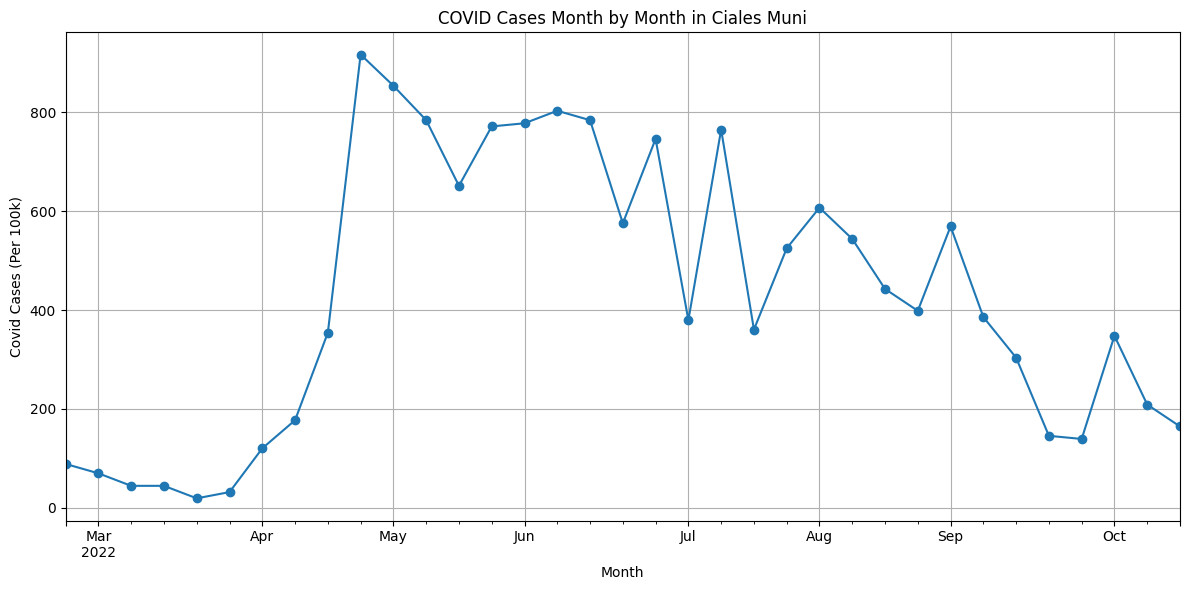

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


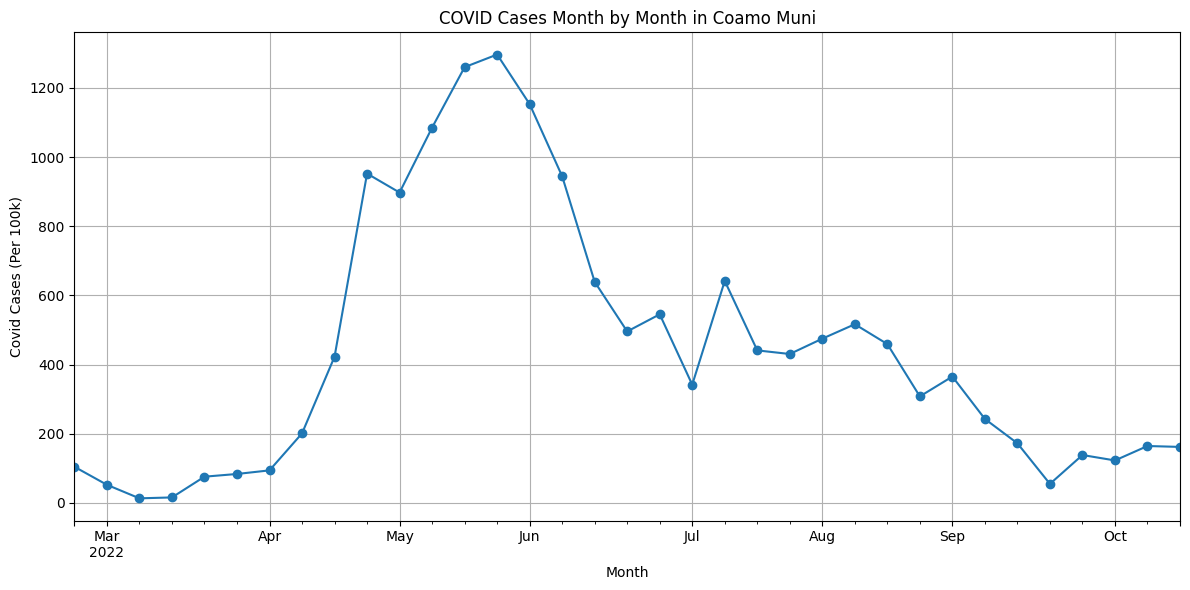

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


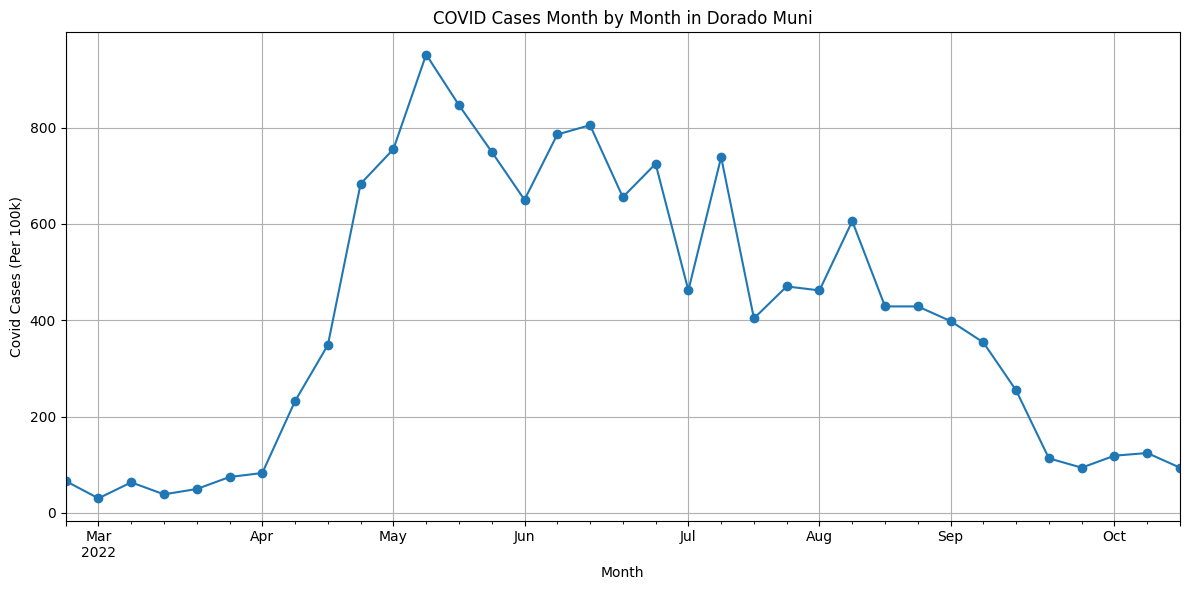

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


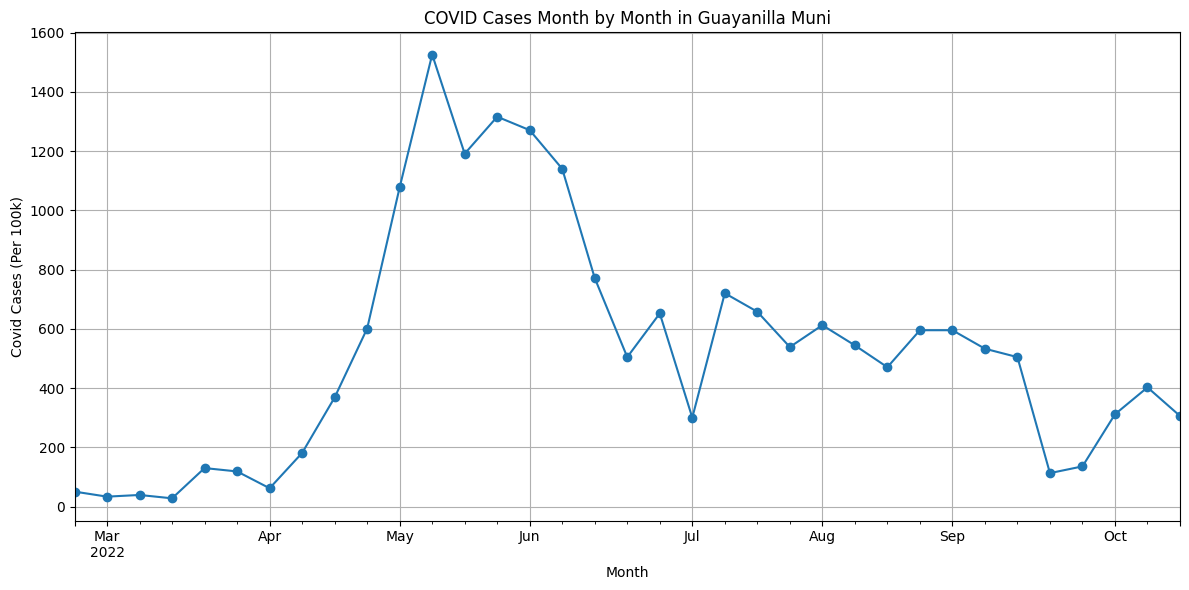

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


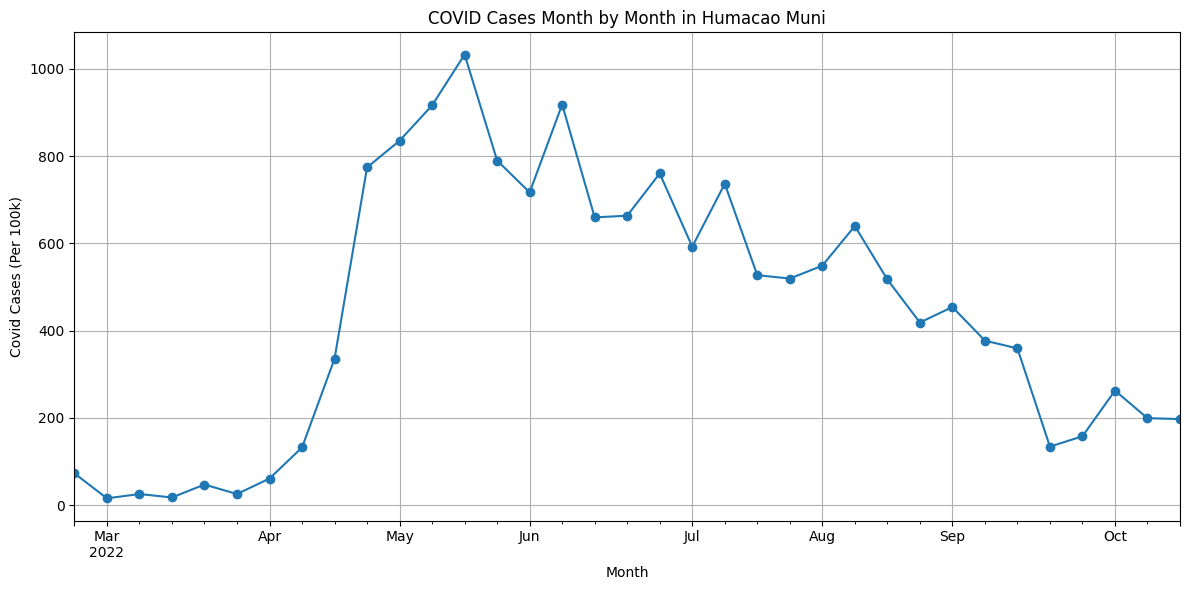

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


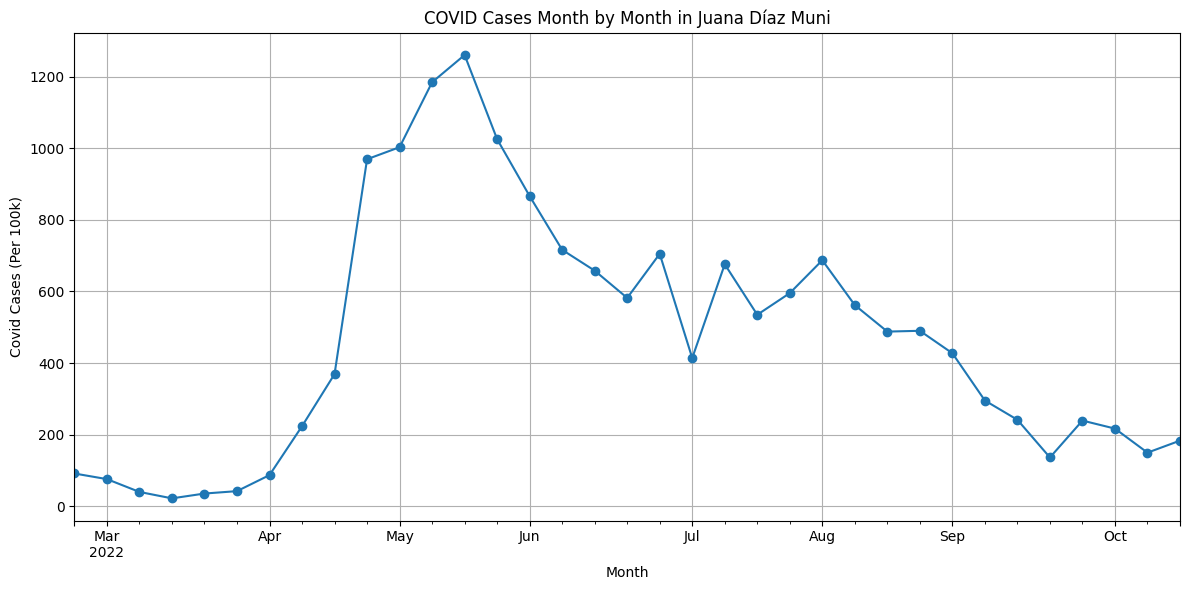

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


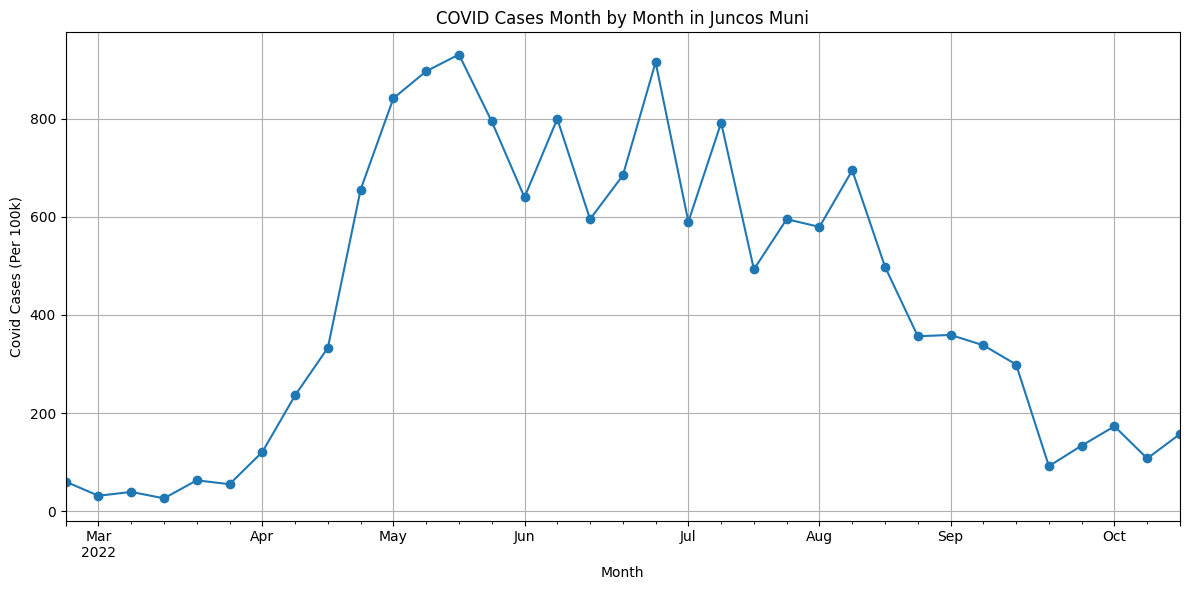

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


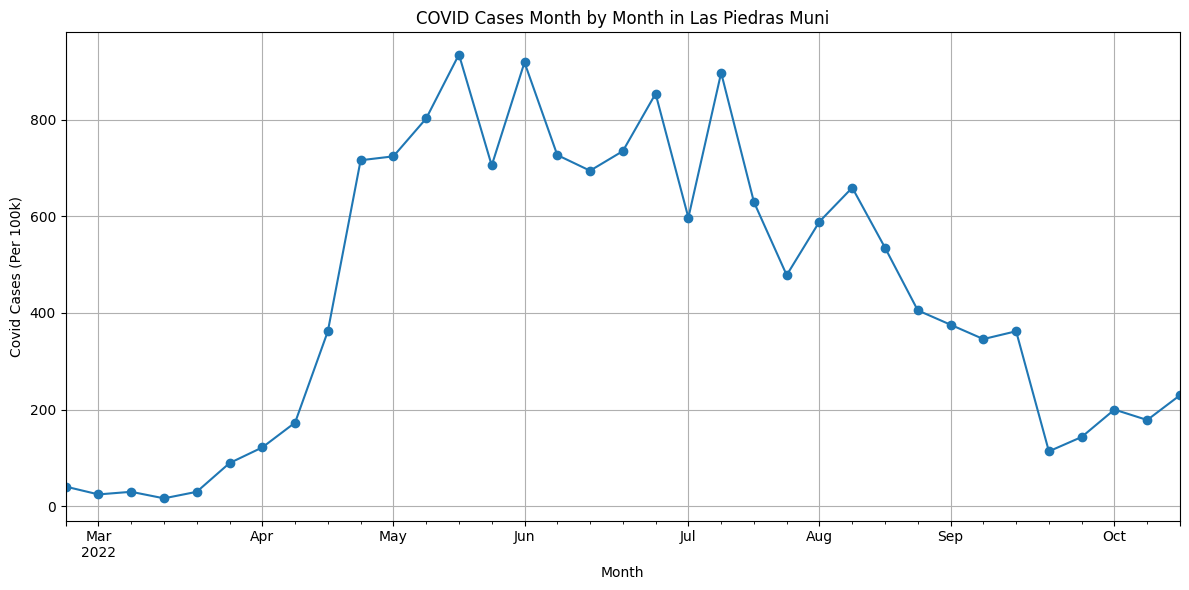

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


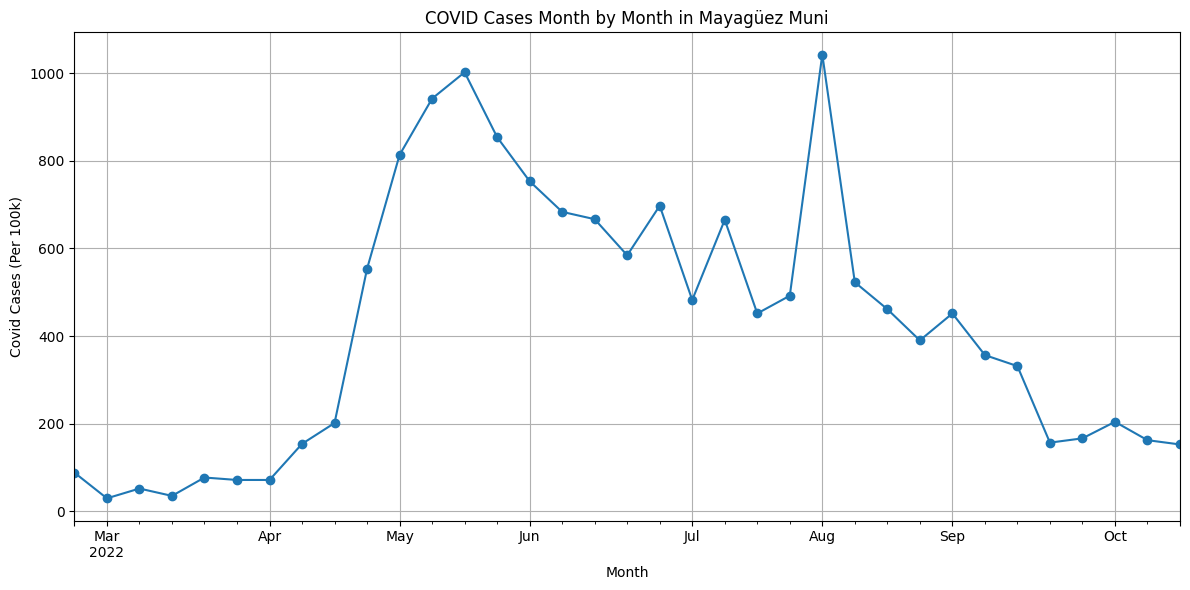

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


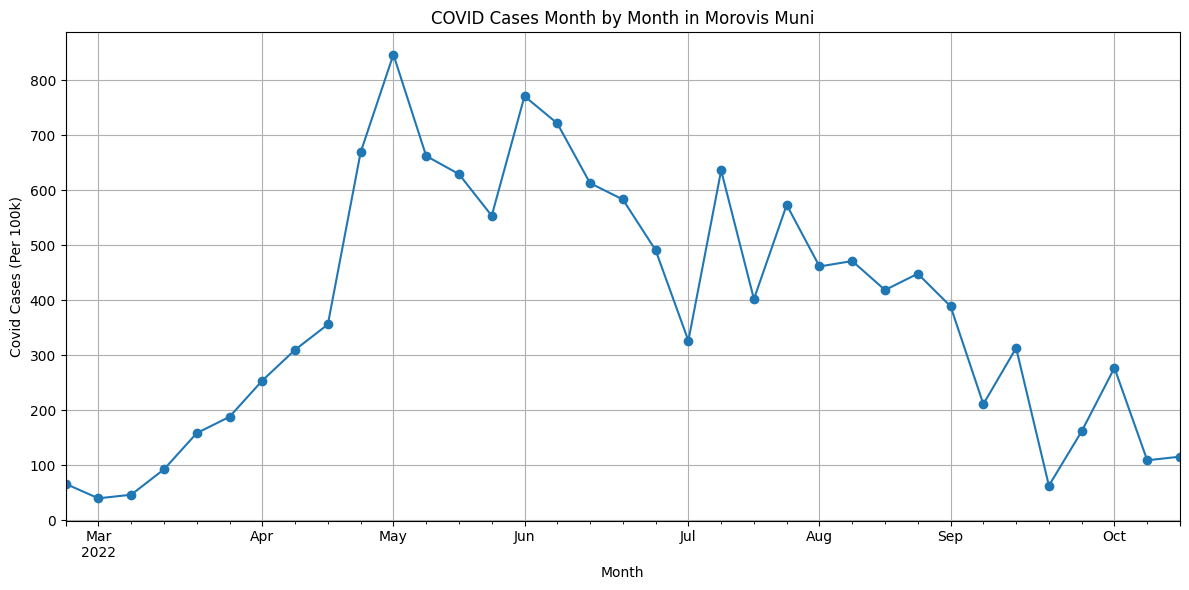

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


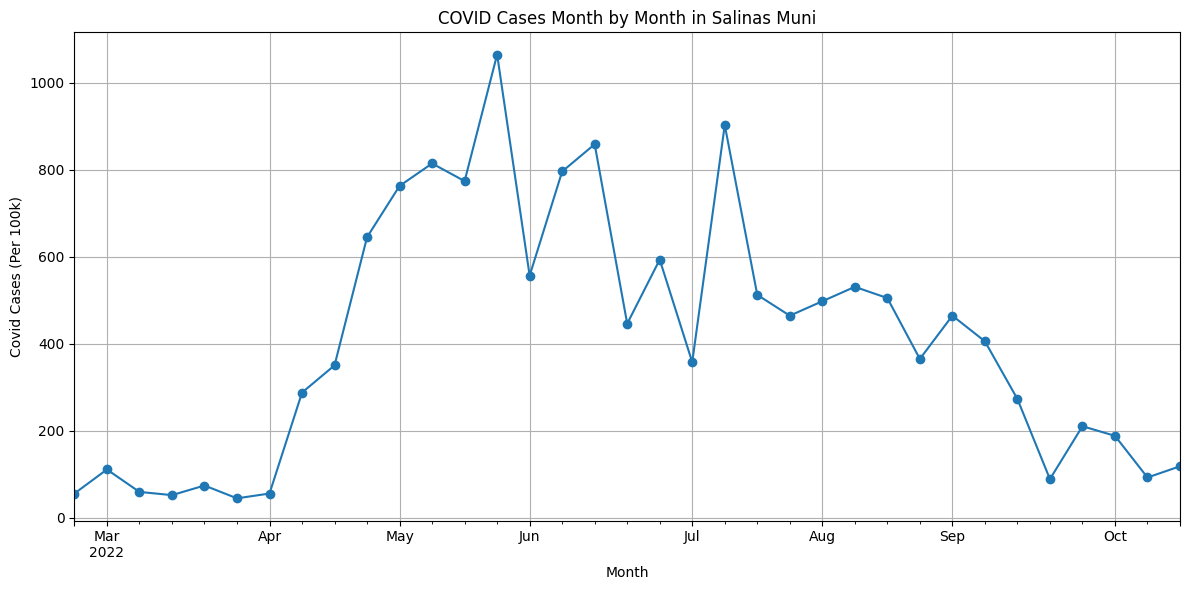

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


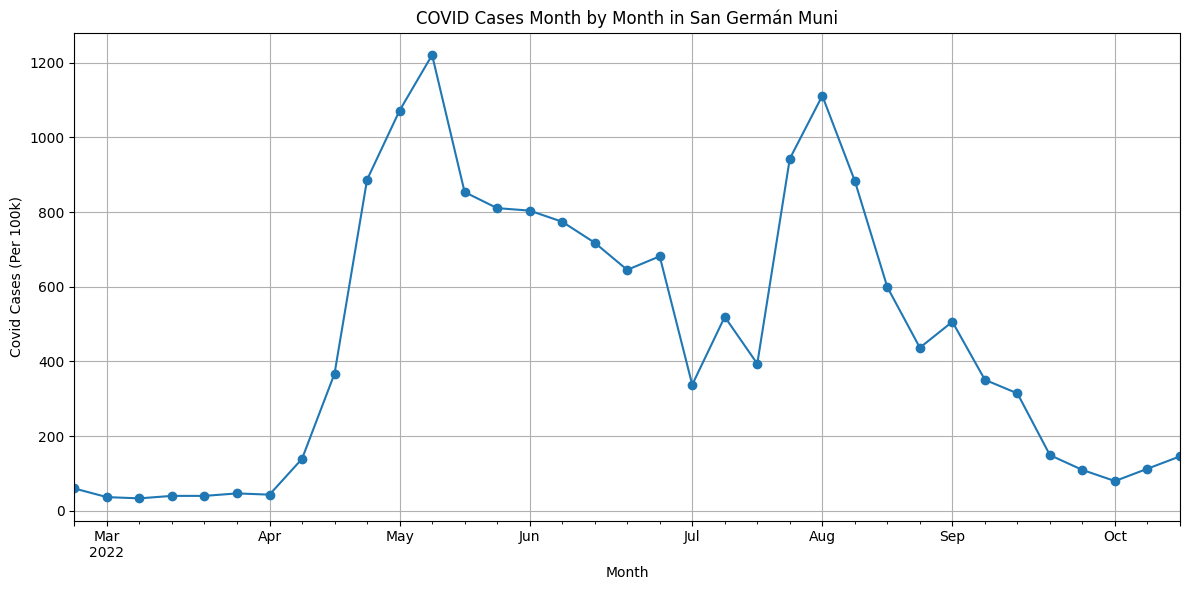

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


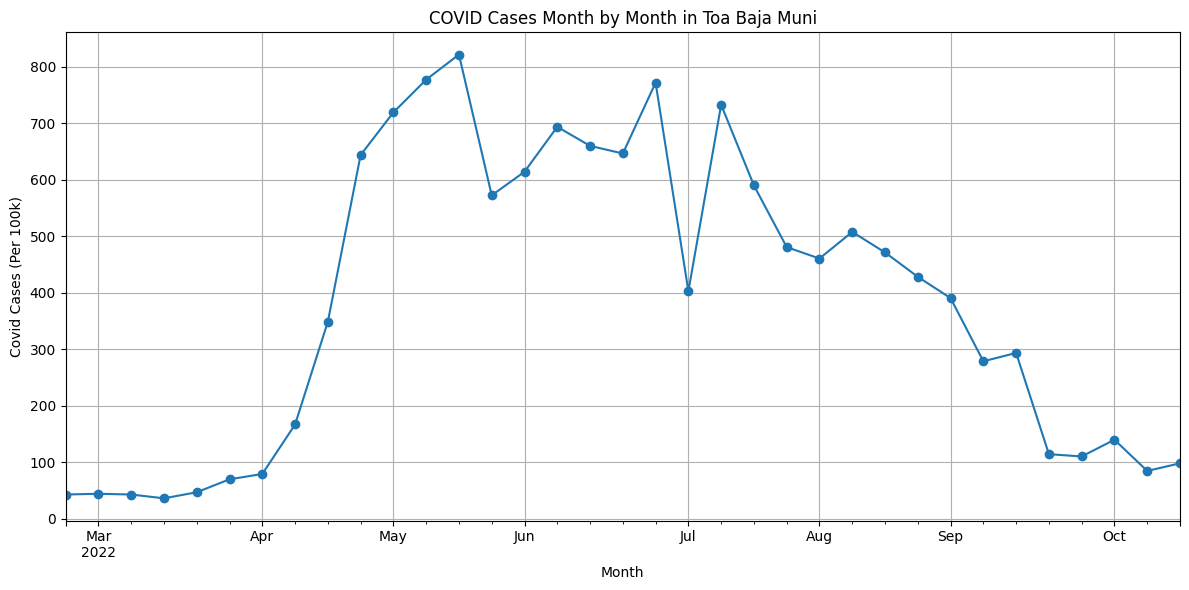

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


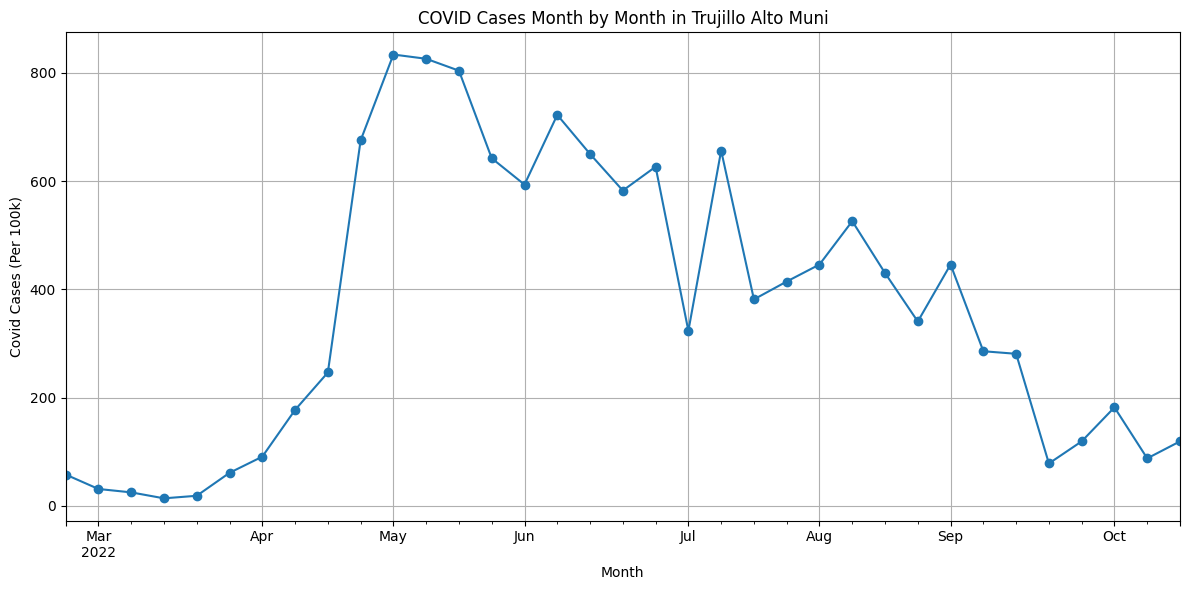

<ipython-input-50-1ad9444cfb64>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


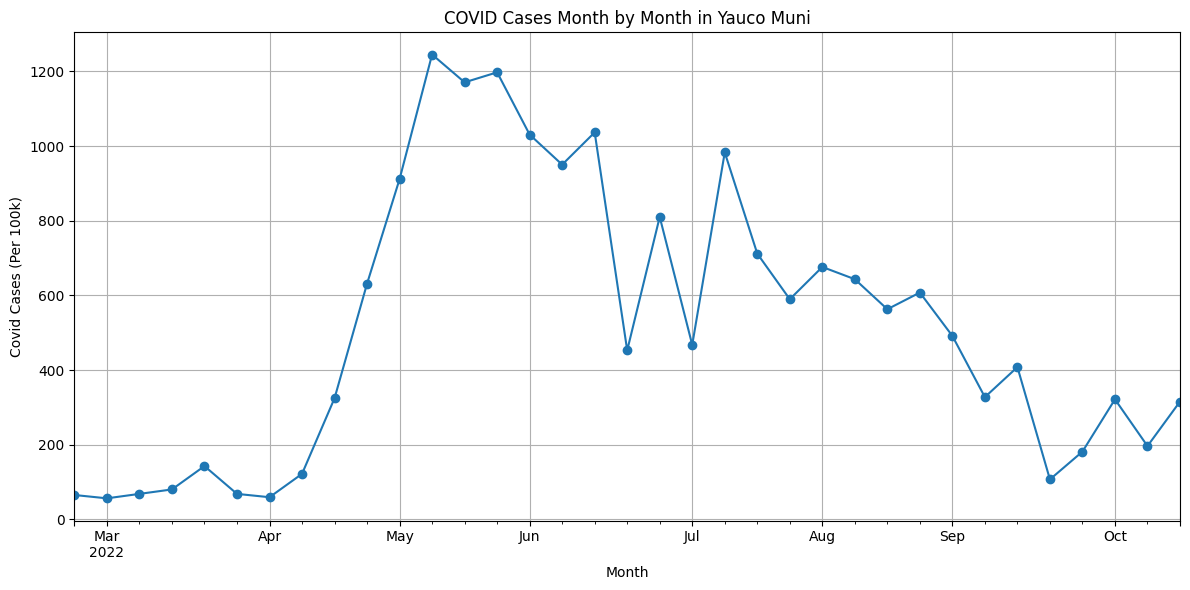

In [ ]:
# find counties
counties = hs['county'].unique()

for county in counties:
  # create new temp dataframe that's specific to each county
  df_county = hs[hs['county'] == county].copy()

  # make sure the date_updated won't cause an error, then group by months
  df_county['date_updated'] = pd.to_datetime(df_county['date_updated'])
  df_county = df_county.groupby(['date_updated']).sum()

  # grab the covid cases per 100k from the df you made and group it by date
  # and take the median cases for each month
  df_to_plot = df_county['covid_cases_per_100k'].groupby(['date_updated']).median()
  df_to_plot = df_to_plot.dropna()

  # graphing code adapted from Tanzim Mostafa for consistency among graphs
  plt.figure(figsize=(12,6))
  df_to_plot.plot(marker='o', ax=plt.gca())
  plt.title('COVID Cases Month by Month in {area}'.format(area=county))
  plt.xlabel('Month')
  plt.ylabel('Covid Cases (Per 100k)')
  plt.grid(True)
  plt.tight_layout()
  plt.show()

<ipython-input-51-60052ad95ca6>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_allcounties = hs.groupby([hs['county'],hs['date_updated'].dt.to_period('M')]).median()


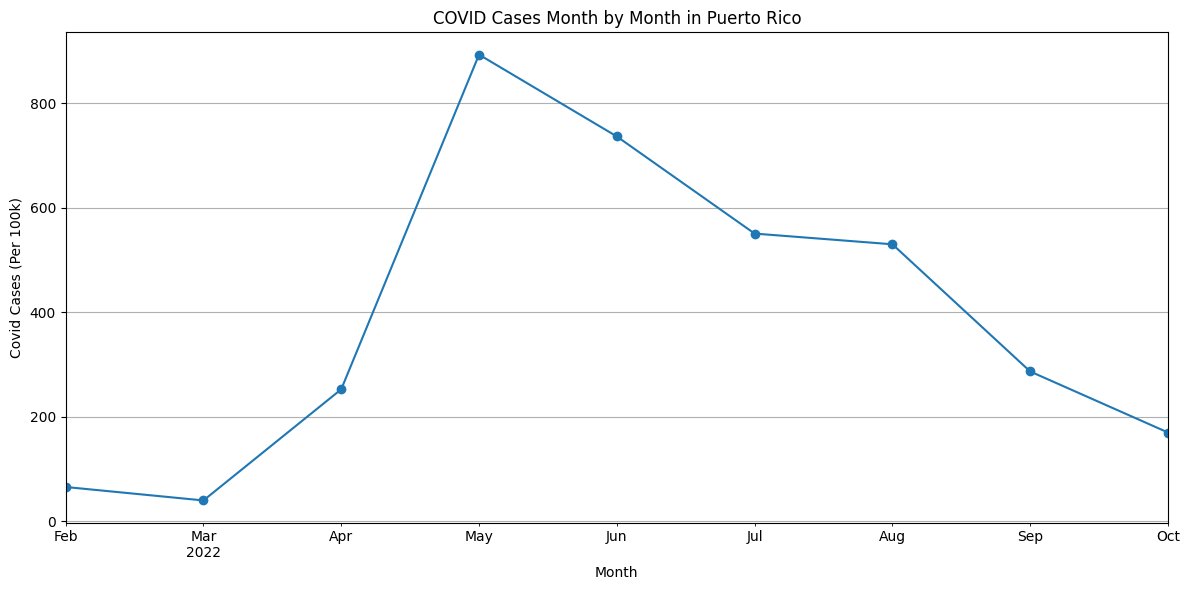

In [ ]:
# Get all the counties
df_allcounties = hs.groupby([hs['county'],hs['date_updated'].dt.to_period('M')]).median()


df_to_plot = df_allcounties['covid_cases_per_100k'].groupby('date_updated').median()
df_to_plot = df_to_plot.dropna()

# graphing code adapted from Tanzim Mostafa for consistency among graphs
plt.figure(figsize=(12,6))
df_to_plot.plot(marker='o', ax=plt.gca())
plt.title('COVID Cases Month by Month in {state}'.format(state=highest_state))
plt.xlabel('Month')
plt.ylabel('Covid Cases (Per 100k)')
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-52-bc224a61c3f2>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


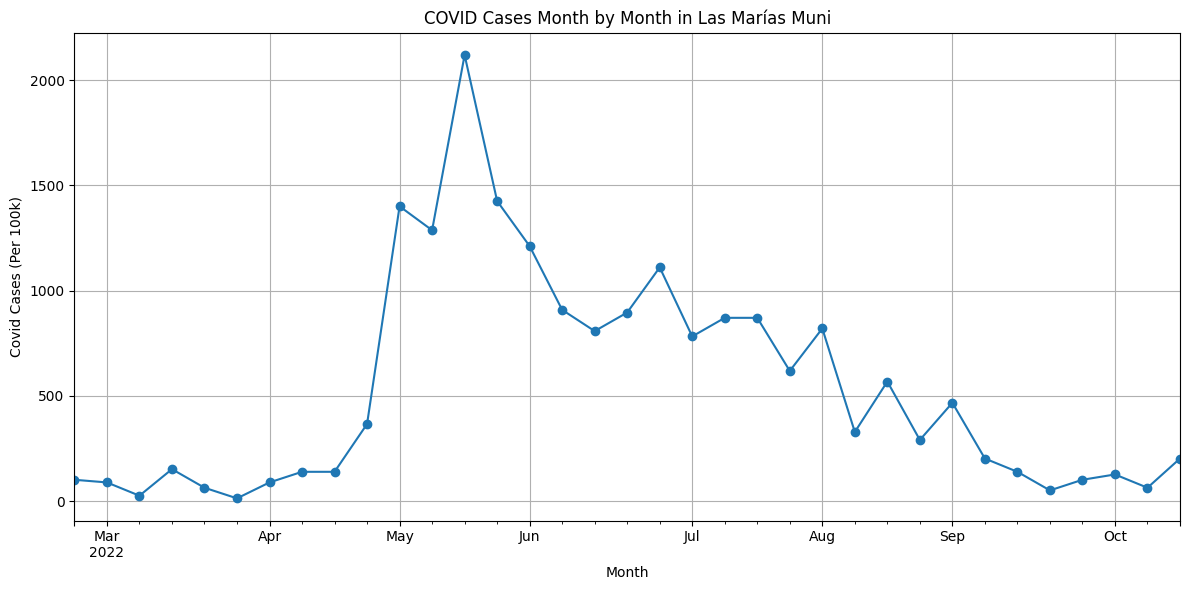

<ipython-input-52-bc224a61c3f2>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_county = df_county.groupby(['date_updated']).sum()


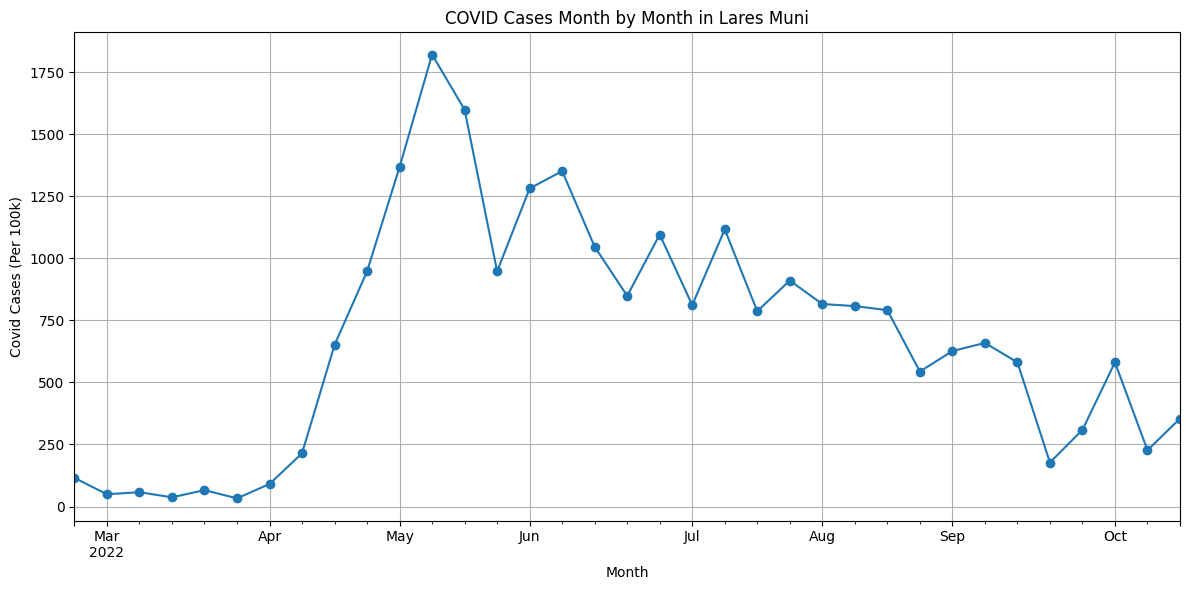

In [ ]:
for county in ['Las Marías Muni', 'Lares Muni']:
  df_county = hs[hs['county'] == county].copy()

  # make sure the date_updated won't cause an error, then group by months
  df_county['date_updated'] = pd.to_datetime(df_county['date_updated'])
  df_county = df_county.groupby(['date_updated']).sum()

  # grab the covid cases per 100k from the df you made and group it by date
  # and take the median cases for each month
  df_to_plot = df_county['covid_cases_per_100k'].groupby(['date_updated']).median()

  # graphing code adapted from Tanzim Mostafa for consistency among graphs
  plt.figure(figsize=(12,6))
  df_to_plot.plot(marker='o', ax=plt.gca())
  plt.title('COVID Cases Month by Month in {area}'.format(area=county))
  plt.xlabel('Month')
  plt.ylabel('Covid Cases (Per 100k)')
  plt.grid(True)
  plt.tight_layout()
  plt.show()

In [ ]:
lm_df = hs[hs['county'] == 'Lares Muni']
lm_df

county  county_fips        state  county_population  \
26      Lares Muni        72081  Puerto Rico            24276.0   
3258    Lares Muni        72081  Puerto Rico            24276.0   
7312    Lares Muni        72081  Puerto Rico            24276.0   
11367   Lares Muni        72081  Puerto Rico            24276.0   
13726   Lares Muni        72081  Puerto Rico            24276.0   
16983   Lares Muni        72081  Puerto Rico            24276.0   
19406   Lares Muni        72081  Puerto Rico            24276.0   
23435   Lares Muni        72081  Puerto Rico            24276.0   
28242   Lares Muni        72081  Puerto Rico            24276.0   
31464   Lares Muni        72081  Puerto Rico            24276.0   
32297   Lares Muni        72081  Puerto Rico            24276.0   
36132   Lares Muni        72081  Puerto Rico            24276.0   
38134   Lares Muni        72081  Puerto Rico            24276.0   
42929   Lares Muni        72081  Puerto Rico            24276.0   
44552   Lares Muni        72081  Puerto Rico            24276.0   
47783   Lares Muni        72081  Puerto Rico            24276.0   
52083   Lares Muni        72081  Puerto Rico            24276.0   
54986   Lares Muni        72081  Puerto Rico            24276.0   
58572   Lares Muni        72081  Puerto Rico            24276.0   
61859   Lares Muni        72081  Puerto Rico            24276.0   
63149   Lares Muni        72081  Puerto Rico            24276.0   
66646   Lares Muni        72081  Puerto Rico            24276.0   
71964   Lares Muni        72081  Puerto Rico            24276.0   
77429   Lares Muni        72081  Puerto Rico            24276.0   
80656   Lares Muni        72081  Puerto Rico            24276.0   
83373   Lares Muni        72081  Puerto Rico            24276.0   
86204   Lares Muni        72081  Puerto Rico            24276.0   
90312   Lares Muni        72081  Puerto Rico            24276.0   
91117   Lares Muni        72081  Puerto Rico            24276.0   
95928   Lares Muni        72081  Puerto Rico            24276.0   
98345   Lares Muni        72081  Puerto Rico            24276.0   
102362  Lares Muni        72081  Puerto Rico            24276.0   
106377  Lares Muni        72081  Puerto Rico            24276.0   
107181  Lares Muni        72081  Puerto Rico            24276.0   
111245  Lares Muni        72081  Puerto Rico            24276.0   

        health_service_area_number health_service_area  \
26                             904         Puerto Rico   
3258                           904         Puerto Rico   
7312                           904         Puerto Rico   
11367                          904         Puerto Rico   
13726                          904         Puerto Rico   
16983                          904         Puerto Rico   
19406                          904         Puerto Rico   
23435                          904         Puerto Rico   
28242                          904         Puerto Rico   
31464                          904         Puerto Rico   
32297                          904         Puerto Rico   
36132                          904         Puerto Rico   
38134                          904         Puerto Rico   
42929                          904         Puerto Rico   
44552                          904         Puerto Rico   
47783                          904         Puerto Rico   
52083                          904         Puerto Rico   
54986                          904         Puerto Rico   
58572                          904         Puerto Rico   
61859                          904         Puerto Rico   
63149                          904         Puerto Rico   
66646                          904         Puerto Rico   
71964                          904         Puerto Rico   
77429                          904         Puerto Rico   
80656                          904         Puerto Rico   
83373                          904         Puerto Rico   
86204                          90

In [ ]:
lm_df_pop = lm_df.groupby(lm_df['date_updated'].dt.to_period('M')).median()

lm_df_pop['county_population']

<ipython-input-54-469de36ff236>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  lm_df_pop = lm_df.groupby(lm_df['date_updated'].dt.to_period('M')).median()


date_updated
2022-02    24276.0
2022-03    24276.0
2022-04    24276.0
2022-05    24276.0
2022-06    24276.0
2022-07    24276.0
2022-08    24276.0
2022-09    24276.0
2022-10    24276.0
Freq: M, Name: county_population, dtype: float64

In [ ]:
lmm_df = hs[hs['county'] == 'Las Marías Muni']
lmm_df

county  county_fips        state  county_population  \
1660    Las Marías Muni        72083  Puerto Rico             7927.0   
4884    Las Marías Muni        72083  Puerto Rico             7927.0   
6517    Las Marías Muni        72083  Puerto Rico             7927.0   
9781    Las Marías Muni        72083  Puerto Rico             7927.0   
12948   Las Marías Muni        72083  Puerto Rico             7927.0   
16190   Las Marías Muni        72083  Puerto Rico             7927.0   
21012   Las Marías Muni        72083  Puerto Rico             7927.0   
22643   Las Marías Muni        72083  Puerto Rico             7927.0   
27449   Las Marías Muni        72083  Puerto Rico             7927.0   
30672   Las Marías Muni        72083  Puerto Rico             7927.0   
33906   Las Marías Muni        72083  Puerto Rico             7927.0   
35566   Las Marías Muni        72083  Puerto Rico             7927.0   
36133   Las Marías Muni        72083  Puerto Rico             7927.0   
38102   Las Marías Muni        72083  Puerto Rico             7927.0   
42136   Las Marías Muni        72083  Puerto Rico             7927.0   
43775   Las Marías Muni        72083  Puerto Rico             7927.0   
47741   Las Marías Muni        72083  Puerto Rico             7927.0   
52041   Las Marías Muni        72083  Puerto Rico             7927.0   
55023   Las Marías Muni        72083  Puerto Rico             7927.0   
58530   Las Marías Muni        72083  Puerto Rico             7927.0   
61895   Las Marías Muni        72083  Puerto Rico             7927.0   
63107   Las Marías Muni        72083  Puerto Rico             7927.0   
66681   Las Marías Muni        72083  Puerto Rico             7927.0   
71965   Las Marías Muni        72083  Puerto Rico             7927.0   
77430   Las Marías Muni        72083  Puerto Rico             7927.0   
80657   Las Marías Muni        72083  Puerto Rico             7927.0   
84606   Las Marías Muni        72083  Puerto Rico             7927.0   
89519   Las Marías Muni        72083  Puerto Rico             7927.0   
92744   Las Marías Muni        72083  Puerto Rico             7927.0   
94363   Las Marías Muni        72083  Puerto Rico             7927.0   
97543   Las Marías Muni        72083  Puerto Rico             7927.0   
100765  Las Marías Muni        72083  Puerto Rico             7927.0   
103989  Las Marías Muni        72083  Puerto Rico             7927.0   
108808  Las Marías Muni        72083  Puerto Rico             7927.0   
110445  Las Marías Muni        72083  Puerto Rico             7927.0   

        health_service_area_number health_service_area  \
1660                           904         Puerto Rico   
4884                           904         Puerto Rico   
6517                           904         Puerto Rico   
9781                           904         Puerto Rico   
12948                          904         Puerto Rico   
16190                          904         Puerto Rico   
21012                          904         Puerto Rico   
22643                          904         Puerto Rico   
27449                          904         Puerto Rico   
30672                          904         Puerto Rico   
33906                          904         Puerto Rico   
35566                          904         Puerto Rico   
36133                          904         Puerto Rico   
38102                          904         Puerto Rico   
42136                          904         Puerto Rico   
43775                          904         Puerto Rico   
47741                          904         Puerto Rico   
52041                          904         Puerto Rico   
55023                          904         Puerto Rico   
58530                          904         Puerto Rico   
61895                          904         Puerto Rico   
63107                          904         Puerto Rico   
66681                          904         Puerto Rico   
71965                          9

In [ ]:
lmm_df_pop = lmm_df.groupby(lmm_df['date_updated'].dt.to_period('M')).median()

lmm_df_pop['county_population']

<ipython-input-56-d2e49f7ee359>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  lmm_df_pop = lmm_df.groupby(lmm_df['date_updated'].dt.to_period('M')).median()


date_updated
2022-02    7927.0
2022-03    7927.0
2022-04    7927.0
2022-05    7927.0
2022-06    7927.0
2022-07    7927.0
2022-08    7927.0
2022-09    7927.0
2022-10    7927.0
Freq: M, Name: county_population, dtype: float64